# This script contains the following points:

### 1. Importing libraries

### 2. Importing and checking data

### 3. Identifying Variables for Exploring Visual Analysis

### 4. Creating a Correlation Matrix Heatmap

### 5. Create Scatterplots

### 6. Create a Pair Plot

### 7. Create a Categorical Plot

### 8. Answer the questions

### 9. Define Hypotheses

### 10. Export visulizations to analysis folder

# 1. Importing libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import warnings

In [2]:
warnings.filterwarnings('ignore')

# 2. Importing and checkind data

In [3]:
# Define the path to the data files
path = r'C:\Users\Priya\COVID-19 Deaths Conditions'

In [4]:
path

'C:\\Users\\Priya\\COVID-19 Deaths Conditions'

In [5]:
# Load the dataset from Prepared data as "df_cov_19"
df_cov_19 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Cleaned_Conditions_Contributing_to_COVID-19_Deaths_by_State_and_Age_Provisional_2020-2023.csv'))

In [6]:
# Check dataset
df_cov_19.head()

,Data As Of,Start Date,End Date,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,2023-09-24,2020-01-01,2020-01-31,2020.0,1.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,NaN
1,2023-09-24,2020-02-01,2020-02-29,2020.0,2.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,NaN
2,2023-09-24,2020-03-01,2020-03-31,2020.0,3.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,NaN
3,2023-09-24,2020-04-01,2020-04-30,2020.0,4.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,NaN
4,2023-09-24,2020-05-01,2020-05-31,2020.0,5.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,NaN


In [7]:
df_cov_19.head()

,Data As Of,Start Date,End Date,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,2023-09-24,2020-01-01,2020-01-31,2020.0,1.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,NaN
1,2023-09-24,2020-02-01,2020-02-29,2020.0,2.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,NaN
2,2023-09-24,2020-03-01,2020-03-31,2020.0,3.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,NaN
3,2023-09-24,2020-04-01,2020-04-30,2020.0,4.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,NaN
4,2023-09-24,2020-05-01,2020-05-31,2020.0,5.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,NaN


In [8]:
df_cov_19.shape

(430560, 13)

# 3. Identifying Variables for Exploring Visual Analysis

### 1) Categorical Variables:
#### State
#### Condition Group
#### Condition
#### Age Group

### 2) Numerical Variables
#### Year
#### Month
#### COVID-19 Deaths
#### Number of Mentions

# 4. Creating a Correlation Matrix Heatmap

In [9]:
selected_columns = ['Year', 'Month', 'State', 'Condition Group', 'Condition', 'Age Group', 'COVID-19 Deaths', 'Number of Mentions']
df_selected = df_cov_19[selected_columns]

In [10]:
# 4 of the selected variables are categorical, so they need to be encoded before running the correlation analysis
df_encoded = df_selected.copy()
df_encoded['State'] = df_encoded['State'].astype('category').cat.codes
df_encoded['Condition Group'] = df_encoded['Condition Group'].astype('category').cat.codes
df_encoded['Condition'] = df_encoded['Condition'].astype('category').cat.codes
df_encoded['Age Group'] = df_encoded['Age Group'].astype('category').cat.codes

In [11]:
# Verify the dataframe
df_encoded.head()

,Year,Month,State,Condition Group,Condition,Age Group,COVID-19 Deaths,Number of Mentions
0,2020.0,1.0,0,9,11,0,0.0,0.0
1,2020.0,2.0,0,9,11,0,0.0,0.0
2,2020.0,3.0,0,9,11,0,0.0,0.0
3,2020.0,4.0,0,9,11,0,0.0,0.0
4,2020.0,5.0,0,9,11,0,0.0,0.0


In [12]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430560 entries, 0 to 430559
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                430560 non-null  float64
 1   Month               430560 non-null  float64
 2   State               430560 non-null  int8   
 3   Condition Group     430560 non-null  int8   
 4   Condition           430560 non-null  int8   
 5   Age Group           430560 non-null  int8   
 6   COVID-19 Deaths     430560 non-null  float64
 7   Number of Mentions  430560 non-null  float64
dtypes: float64(4), int8(4)
memory usage: 14.8 MB


In [13]:
df_encoded.shape

(430560, 8)

In [14]:
# Calculate the corelation matrix
corr_matrix = df_encoded.corr()
print(corr_matrix)

                            Year         Month         State  Condition Group  \
Year                1.000000e+00 -1.322529e-01 -2.265890e-11     2.204744e-13   
Month              -1.322529e-01  1.000000e+00 -1.185940e-14     2.073373e-16   
State              -2.265890e-11 -1.185940e-14  1.000000e+00    -2.050765e-17   
Condition Group     2.204744e-13  2.073373e-16 -2.050765e-17     1.000000e+00   
Condition           7.042147e-14  1.997066e-17 -2.410199e-14     6.493454e-01   
Age Group          -2.103677e-14 -1.506794e-17  9.973261e-15    -2.222807e-21   
COVID-19 Deaths    -6.977647e-02  8.076865e-03 -1.462006e-02    -4.844315e-02   
Number of Mentions -6.922132e-02  7.921721e-03 -1.316259e-02    -6.448103e-02   

                       Condition     Age Group  COVID-19 Deaths  \
Year                7.042147e-14 -2.103677e-14        -0.069776   
Month               1.997066e-17 -1.506794e-17         0.008077   
State              -2.410199e-14  9.973261e-15        -0.014620   
Co

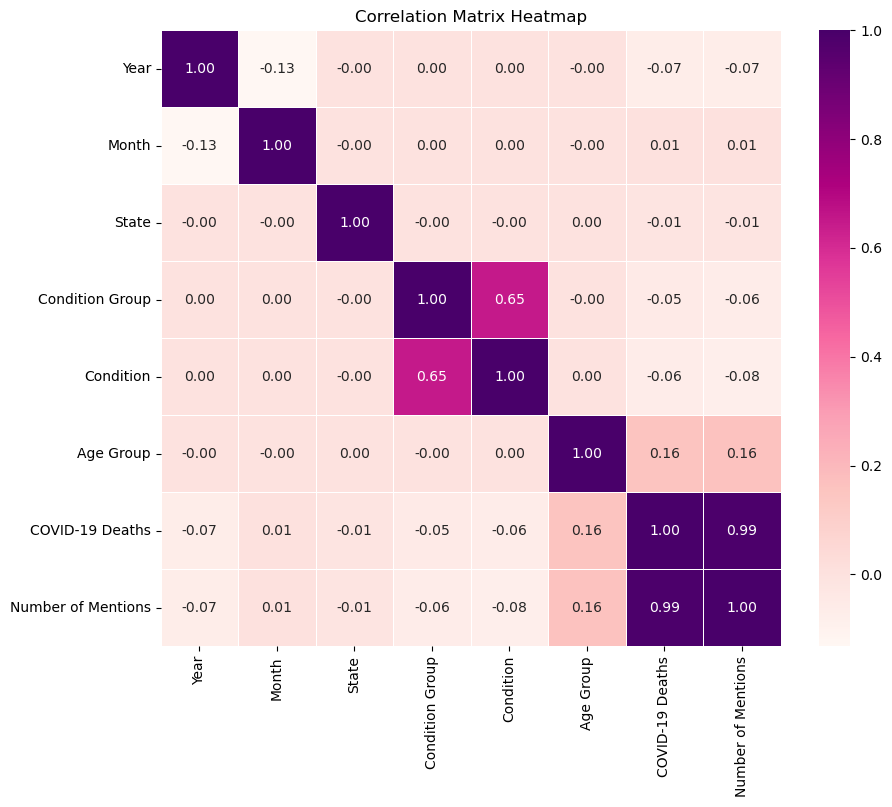

In [15]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdPu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
heatmap_corr_matrix = plt.gcf()
plt.show()

### Top Positive Correlations
COVID-19 Deaths and Number of Mentions: 0.989012

Condition and Condition Group: 0.649345

Age Group and Number of Mentions: 0.161664  

Age Group and COVID-19 Deaths: 0.157715

Month and Number Of Mentions: 0.007922

Month and COVID-19 Deaths: 0.008077

### Top Negative Correlations
Year and Month: -0.132253

Condition and Number of Mentions: -0.075352

Year and Number of Mentions: -0.069221 

Condition and COVID-19 Deaths: -0.063357

Condition Group and Number of Mentions: -0.064481

Condition Group and COVID-19 Deaths: -0.048443

State and COVID-19 Deaths: -0.014620 

State and Number of Mentions: -0.013163


### Explor correlations within the Condition column

In [16]:
# Create a list of unique medical conditions from "Condition" column
conditions = df_selected['Condition'].unique()

Correlation Matrix for Influenza and pneumonia:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -1.931483e-13 -1.777901e-14   
Month              -1.322529e-01  1.000000e+00 -7.373883e-15 -1.162213e-16   
State              -1.931483e-13 -7.373883e-15  1.000000e+00 -7.352989e-16   
Age Group          -1.777901e-14 -1.162213e-16 -7.352989e-16  1.000000e+00   
COVID-19 Deaths    -1.238217e-01  1.731310e-02 -2.952656e-02  2.237528e-01   
Number of Mentions -1.235048e-01  1.746982e-02 -2.837513e-02  2.246794e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.123822           -0.123505  
Month                      0.017313            0.017470  
State                     -0.029527           -0.028375  
Age Group                  0.223753            0.224679  
COVID-19 Deaths            1.000000            0.999627  
Number of Mentions         0.999627            1.000000 

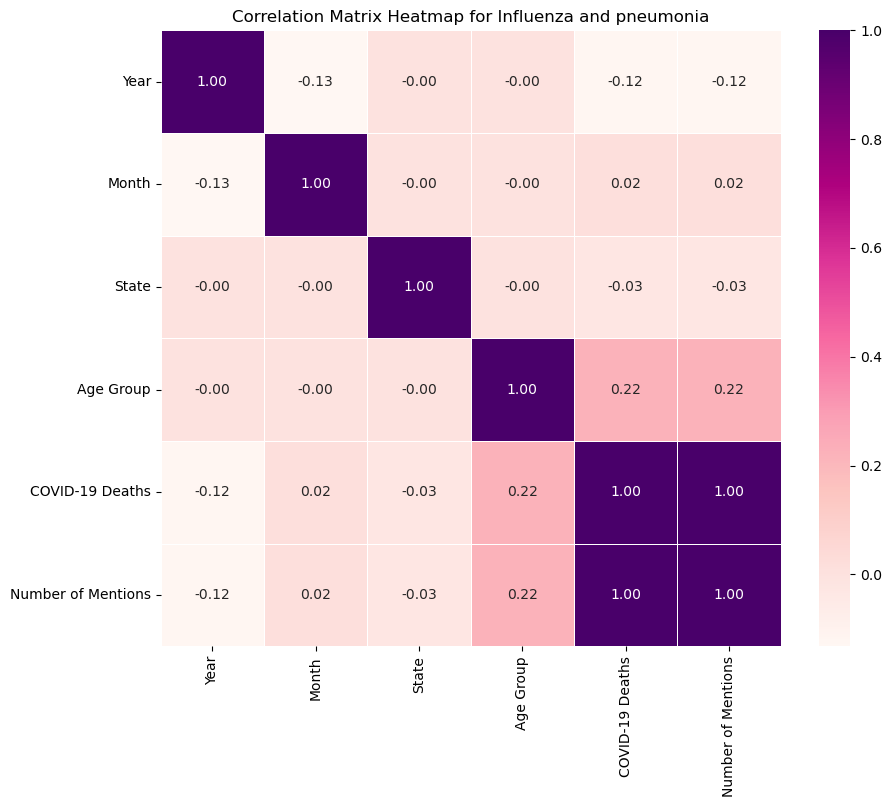

Correlation Matrix for Chronic lower respiratory diseases:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -1.931483e-13 -1.777901e-14   
Month              -1.322529e-01  1.000000e+00 -7.373883e-15 -1.162213e-16   
State              -1.931483e-13 -7.373883e-15  1.000000e+00 -7.352989e-16   
Age Group          -1.777901e-14 -1.162213e-16 -7.352989e-16  1.000000e+00   
COVID-19 Deaths    -1.014540e-01  1.901291e-02 -1.861722e-02  3.300029e-01   
Number of Mentions -9.889222e-02  1.865865e-02 -1.740869e-02  3.287490e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.101454           -0.098892  
Month                      0.019013            0.018659  
State                     -0.018617           -0.017409  
Age Group                  0.330003            0.328749  
COVID-19 Deaths            1.000000            0.990844  
Number of Mentions         0.990844          

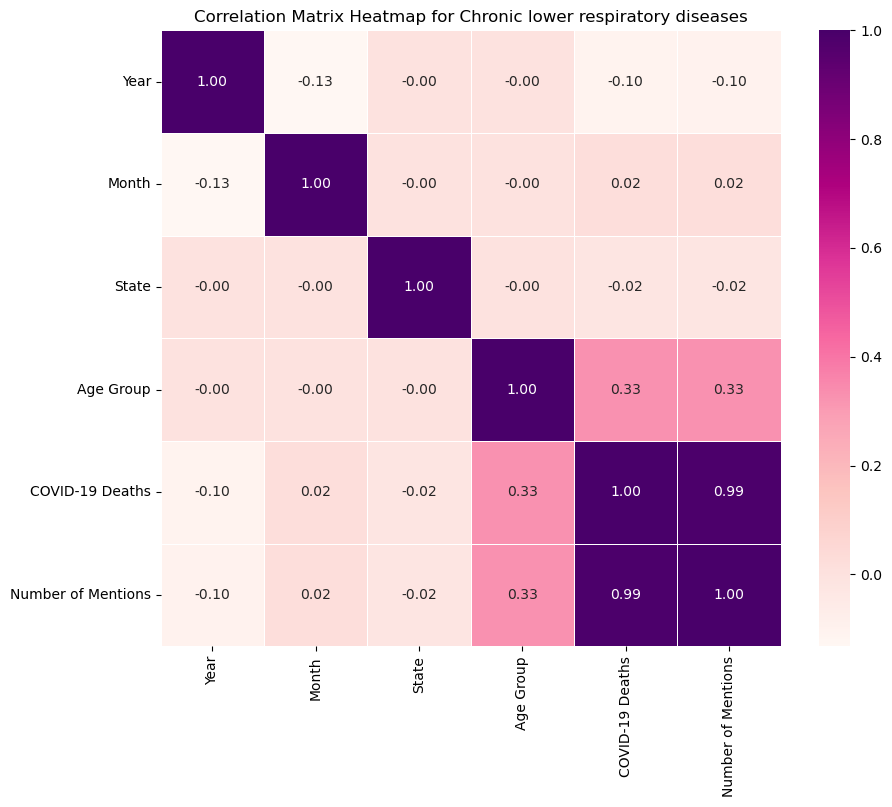

Correlation Matrix for Adult respiratory distress syndrome:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -1.931483e-13 -1.777901e-14   
Month              -1.322529e-01  1.000000e+00 -7.373883e-15 -1.162213e-16   
State              -1.931483e-13 -7.373883e-15  1.000000e+00 -7.352989e-16   
Age Group          -1.777901e-14 -1.162213e-16 -7.352989e-16  1.000000e+00   
COVID-19 Deaths    -1.642690e-01  1.765024e-02 -2.099106e-02  1.682735e-01   
Number of Mentions -1.656610e-01  1.806448e-02 -2.137482e-02  1.685296e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.164269           -0.165661  
Month                      0.017650            0.018064  
State                     -0.020991           -0.021375  
Age Group                  0.168273            0.168530  
COVID-19 Deaths            1.000000            0.993687  
Number of Mentions         0.993687         

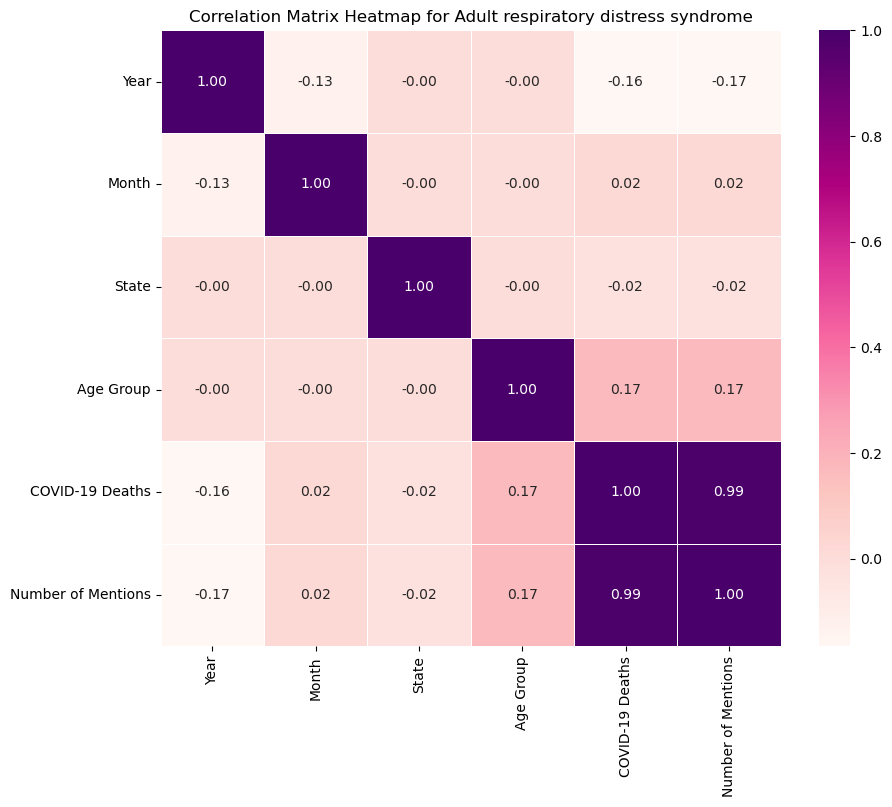

Correlation Matrix for Respiratory failure:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -1.931483e-13 -1.777901e-14   
Month              -1.322529e-01  1.000000e+00 -7.373883e-15 -1.162213e-16   
State              -1.931483e-13 -7.373883e-15  1.000000e+00 -7.352989e-16   
Age Group          -1.777901e-14 -1.162213e-16 -7.352989e-16  1.000000e+00   
COVID-19 Deaths    -1.201168e-01  1.631765e-02 -3.830241e-02  2.341462e-01   
Number of Mentions -1.188585e-01  1.595629e-02 -3.728699e-02  2.379761e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.120117           -0.118859  
Month                      0.016318            0.015956  
State                     -0.038302           -0.037287  
Age Group                  0.234146            0.237976  
COVID-19 Deaths            1.000000            0.999456  
Number of Mentions         0.999456            1.000000   



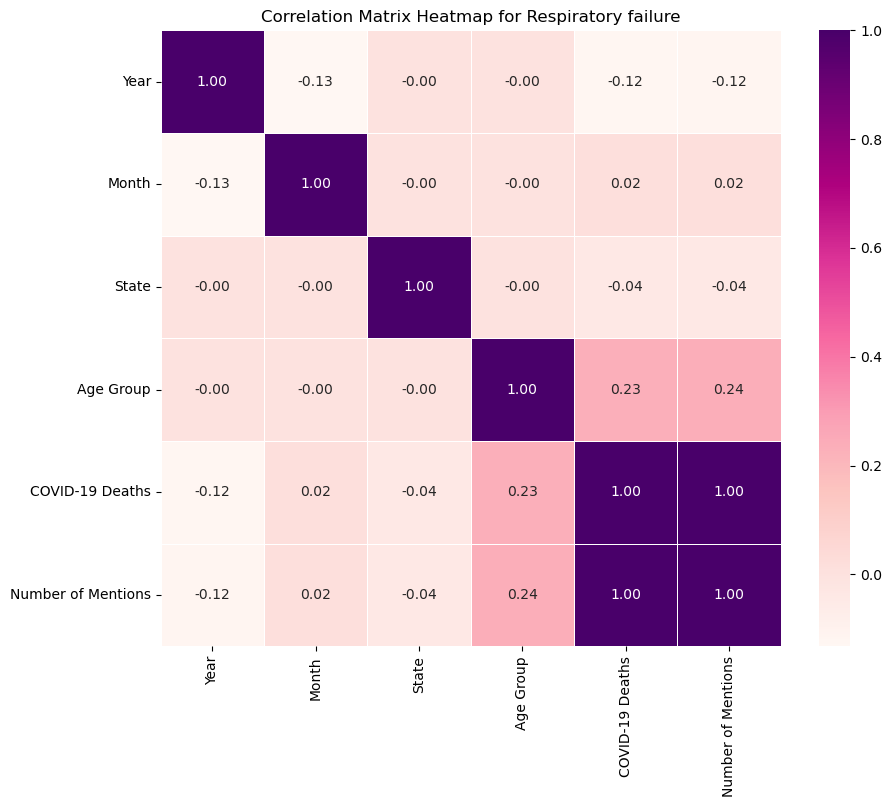

Correlation Matrix for Respiratory arrest:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -1.931483e-13 -1.777901e-14   
Month              -1.322529e-01  1.000000e+00 -7.373883e-15 -1.162213e-16   
State              -1.931483e-13 -7.373883e-15  1.000000e+00 -7.352989e-16   
Age Group          -1.777901e-14 -1.162213e-16 -7.352989e-16  1.000000e+00   
COVID-19 Deaths    -1.026267e-01  2.813380e-02 -7.081423e-02  2.711216e-01   
Number of Mentions -1.035581e-01  2.575948e-02 -6.847371e-02  2.719004e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.102627           -0.103558  
Month                      0.028134            0.025759  
State                     -0.070814           -0.068474  
Age Group                  0.271122            0.271900  
COVID-19 Deaths            1.000000            0.939034  
Number of Mentions         0.939034            1.000000   



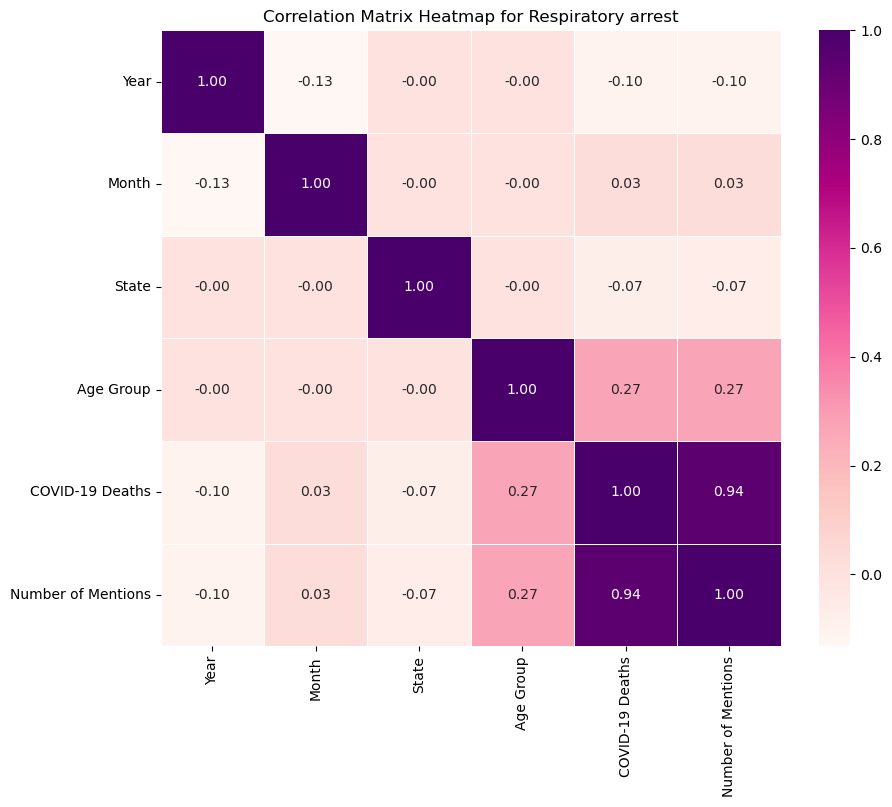

Correlation Matrix for Other diseases of the respiratory system:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -1.931483e-13 -1.777901e-14   
Month              -1.322529e-01  1.000000e+00 -7.373883e-15 -1.162213e-16   
State              -1.931483e-13 -7.373883e-15  1.000000e+00 -7.352989e-16   
Age Group          -1.777901e-14 -1.162213e-16 -7.352989e-16  1.000000e+00   
COVID-19 Deaths    -6.110533e-02  9.294091e-03 -1.952839e-02  3.121180e-01   
Number of Mentions -6.014296e-02  9.774796e-03 -1.848826e-02  3.083531e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.061105           -0.060143  
Month                      0.009294            0.009775  
State                     -0.019528           -0.018488  
Age Group                  0.312118            0.308353  
COVID-19 Deaths            1.000000            0.962209  
Number of Mentions         0.962209    

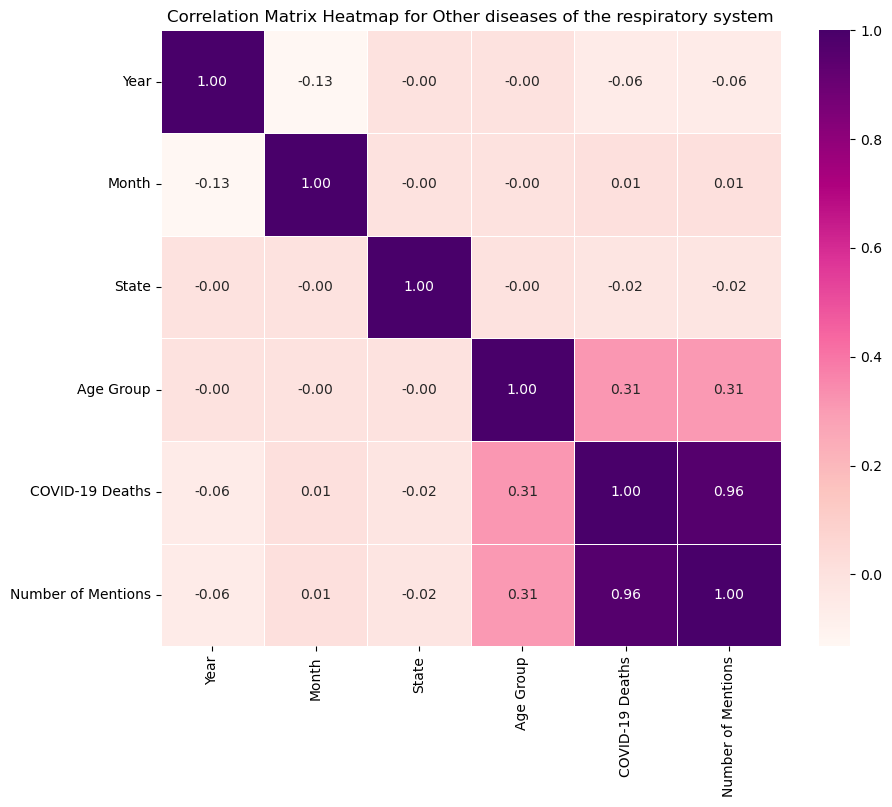

Correlation Matrix for Hypertensive diseases:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -1.931483e-13 -1.777901e-14   
Month              -1.322529e-01  1.000000e+00 -7.373883e-15 -1.162213e-16   
State              -1.931483e-13 -7.373883e-15  1.000000e+00 -7.352989e-16   
Age Group          -1.777901e-14 -1.162213e-16 -7.352989e-16  1.000000e+00   
COVID-19 Deaths    -1.152010e-01  6.844262e-03 -2.459961e-02  2.535337e-01   
Number of Mentions -1.140729e-01  5.983665e-03 -2.326217e-02  2.555857e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.115201           -0.114073  
Month                      0.006844            0.005984  
State                     -0.024600           -0.023262  
Age Group                  0.253534            0.255586  
COVID-19 Deaths            1.000000            0.998516  
Number of Mentions         0.998516            1.000000   

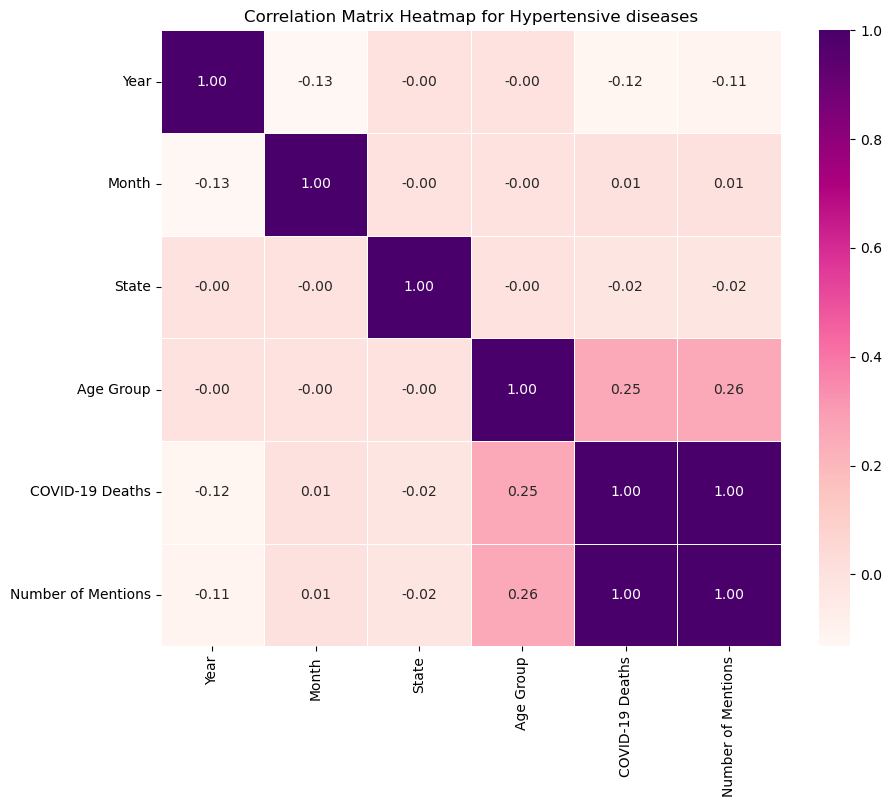

Correlation Matrix for Ischemic heart disease:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -1.931483e-13 -1.777901e-14   
Month              -1.322529e-01  1.000000e+00 -7.373883e-15 -1.162213e-16   
State              -1.931483e-13 -7.373883e-15  1.000000e+00 -7.352989e-16   
Age Group          -1.777901e-14 -1.162213e-16 -7.352989e-16  1.000000e+00   
COVID-19 Deaths    -1.005185e-01  1.211911e-02 -1.507032e-02  3.023732e-01   
Number of Mentions -9.848536e-02  1.120599e-02 -1.479193e-02  3.029626e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.100518           -0.098485  
Month                      0.012119            0.011206  
State                     -0.015070           -0.014792  
Age Group                  0.302373            0.302963  
COVID-19 Deaths            1.000000            0.994934  
Number of Mentions         0.994934            1.000000  

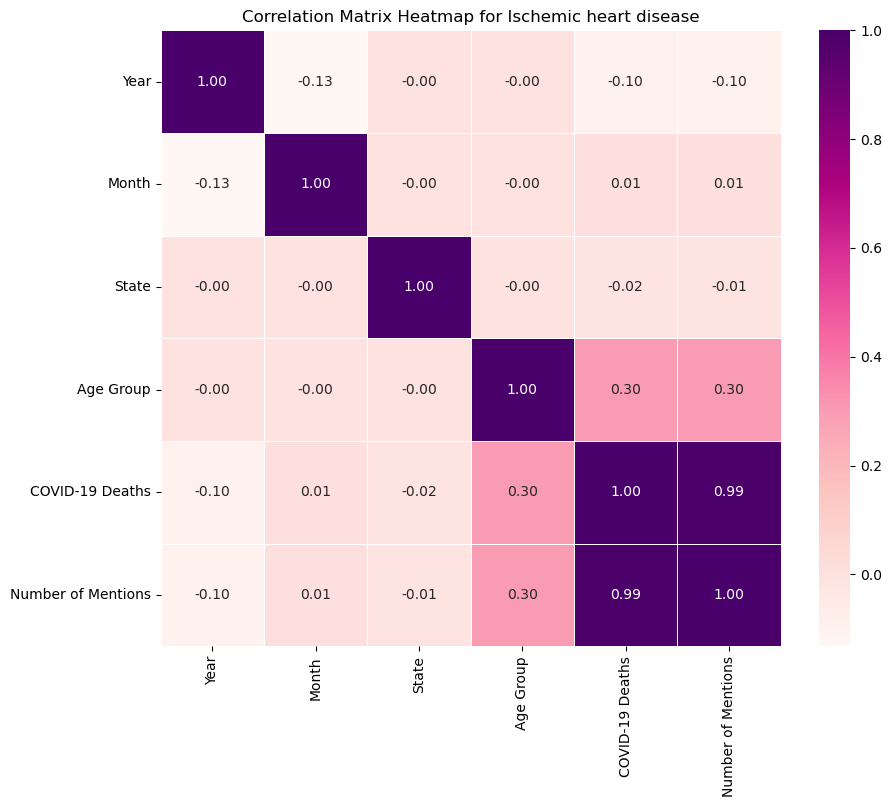

Correlation Matrix for Cardiac arrest:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -1.931483e-13 -1.777901e-14   
Month              -1.322529e-01  1.000000e+00 -7.373883e-15 -1.162213e-16   
State              -1.931483e-13 -7.373883e-15  1.000000e+00 -7.352989e-16   
Age Group          -1.777901e-14 -1.162213e-16 -7.352989e-16  1.000000e+00   
COVID-19 Deaths    -7.940802e-02 -9.365662e-03 -6.420423e-02  1.624426e-01   
Number of Mentions -7.962048e-02 -1.001539e-02 -6.363396e-02  1.620411e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.079408           -0.079620  
Month                     -0.009366           -0.010015  
State                     -0.064204           -0.063634  
Age Group                  0.162443            0.162041  
COVID-19 Deaths            1.000000            0.997826  
Number of Mentions         0.997826            1.000000   



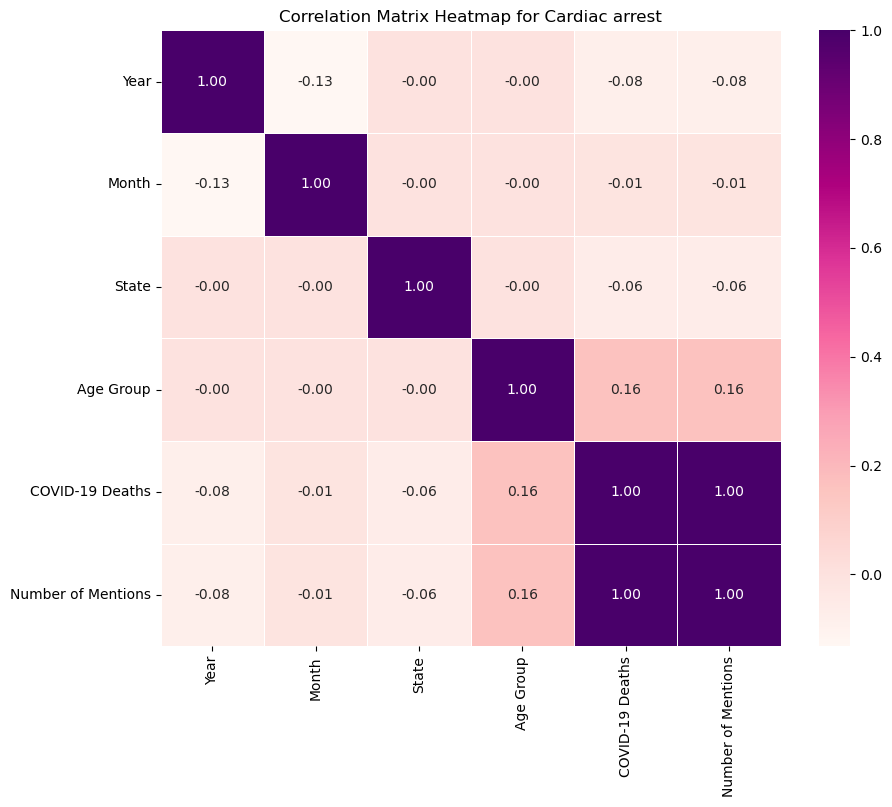

Correlation Matrix for Cardiac arrhythmia:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -1.931483e-13 -1.777901e-14   
Month              -1.322529e-01  1.000000e+00 -7.373883e-15 -1.162213e-16   
State              -1.931483e-13 -7.373883e-15  1.000000e+00 -7.352989e-16   
Age Group          -1.777901e-14 -1.162213e-16 -7.352989e-16  1.000000e+00   
COVID-19 Deaths    -8.191614e-02  1.220690e-02 -8.437907e-03  3.300236e-01   
Number of Mentions -8.124492e-02  1.291627e-02 -8.743288e-03  3.302048e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.081916           -0.081245  
Month                      0.012207            0.012916  
State                     -0.008438           -0.008743  
Age Group                  0.330024            0.330205  
COVID-19 Deaths            1.000000            0.991258  
Number of Mentions         0.991258            1.000000   



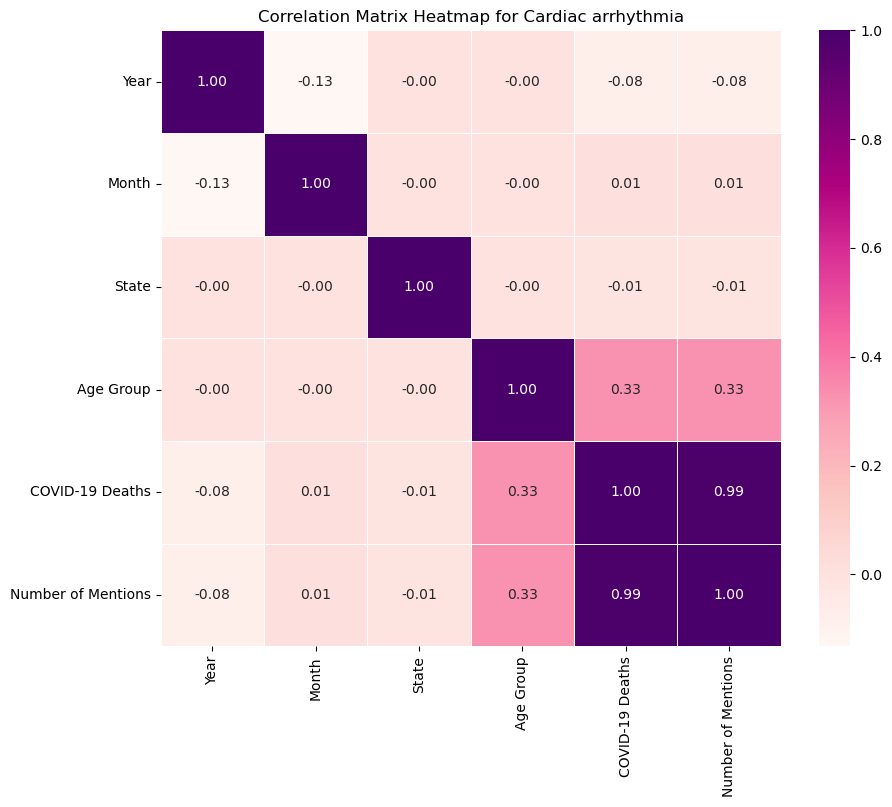

Correlation Matrix for Heart failure:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -1.931483e-13 -1.777901e-14   
Month              -1.322529e-01  1.000000e+00 -7.373883e-15 -1.162213e-16   
State              -1.931483e-13 -7.373883e-15  1.000000e+00 -7.352989e-16   
Age Group          -1.777901e-14 -1.162213e-16 -7.352989e-16  1.000000e+00   
COVID-19 Deaths    -7.497016e-02  6.691456e-03 -8.690057e-03  3.590818e-01   
Number of Mentions -7.565225e-02  6.495700e-03 -8.800254e-03  3.584929e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.074970           -0.075652  
Month                      0.006691            0.006496  
State                     -0.008690           -0.008800  
Age Group                  0.359082            0.358493  
COVID-19 Deaths            1.000000            0.990584  
Number of Mentions         0.990584            1.000000   



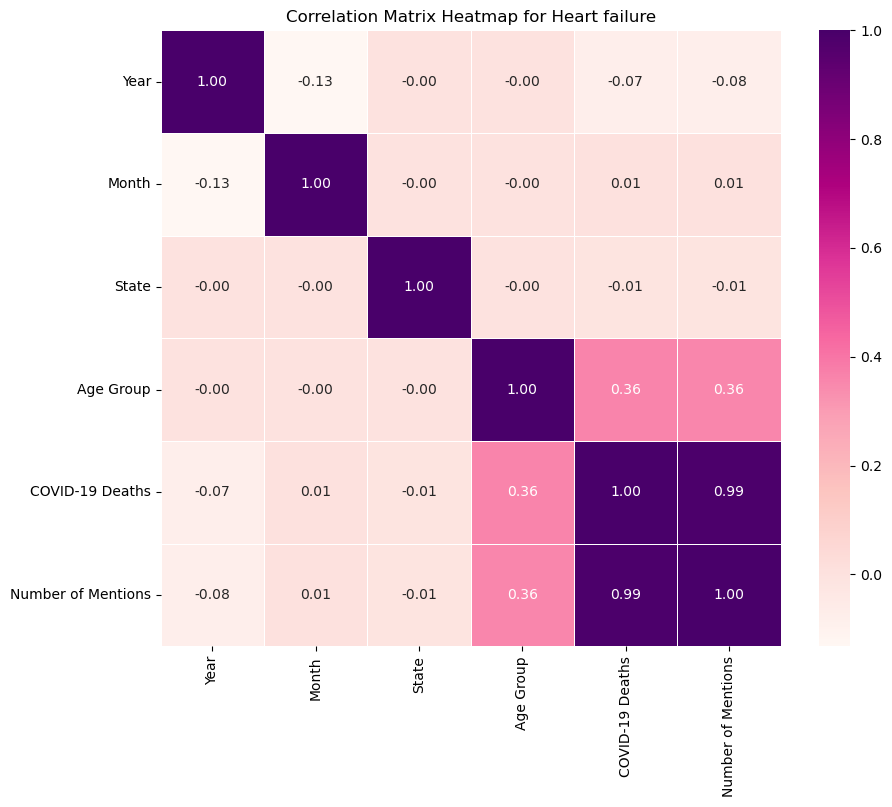

Correlation Matrix for Cerebrovascular diseases:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -1.931483e-13 -1.777901e-14   
Month              -1.322529e-01  1.000000e+00 -7.373883e-15 -1.162213e-16   
State              -1.931483e-13 -7.373883e-15  1.000000e+00 -7.352989e-16   
Age Group          -1.777901e-14 -1.162213e-16 -7.352989e-16  1.000000e+00   
COVID-19 Deaths    -8.657717e-02  7.694810e-03 -2.027122e-02  3.401083e-01   
Number of Mentions -8.749519e-02  8.367894e-03 -1.962898e-02  3.399635e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.086577           -0.087495  
Month                      0.007695            0.008368  
State                     -0.020271           -0.019629  
Age Group                  0.340108            0.339963  
COVID-19 Deaths            1.000000            0.974335  
Number of Mentions         0.974335            1.000000

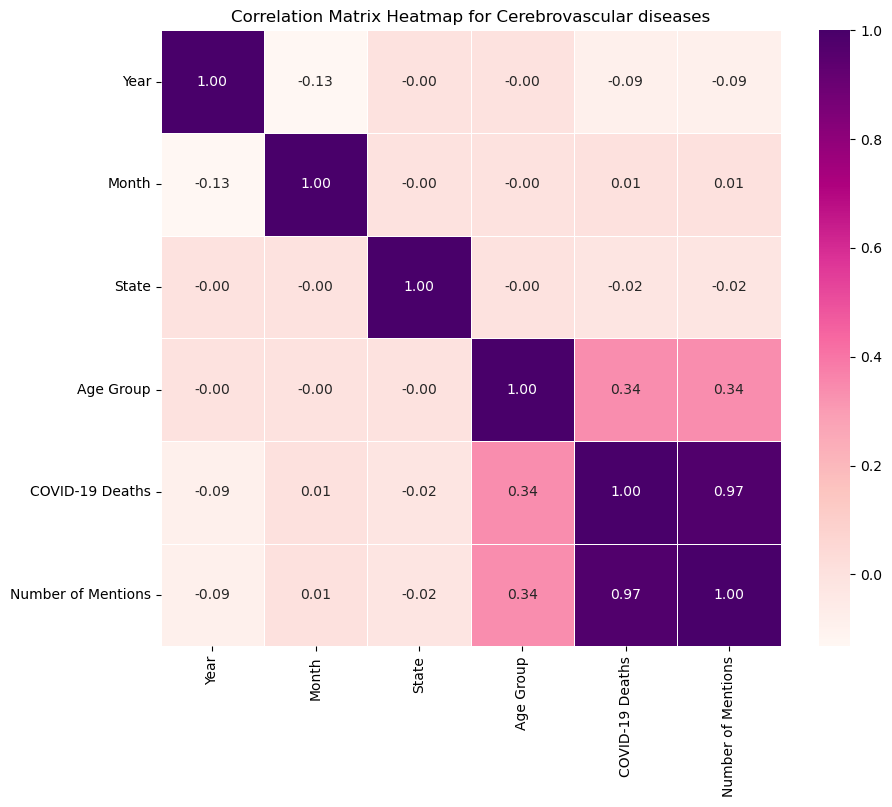

Correlation Matrix for Other diseases of the circulatory system:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -1.931483e-13 -1.777901e-14   
Month              -1.322529e-01  1.000000e+00 -7.373883e-15 -1.162213e-16   
State              -1.931483e-13 -7.373883e-15  1.000000e+00 -7.352989e-16   
Age Group          -1.777901e-14 -1.162213e-16 -7.352989e-16  1.000000e+00   
COVID-19 Deaths    -7.918076e-02  1.027655e-02 -1.372212e-02  3.065048e-01   
Number of Mentions -7.768887e-02  9.122881e-03 -1.156295e-02  3.078234e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.079181           -0.077689  
Month                      0.010277            0.009123  
State                     -0.013722           -0.011563  
Age Group                  0.306505            0.307823  
COVID-19 Deaths            1.000000            0.981257  
Number of Mentions         0.981257    

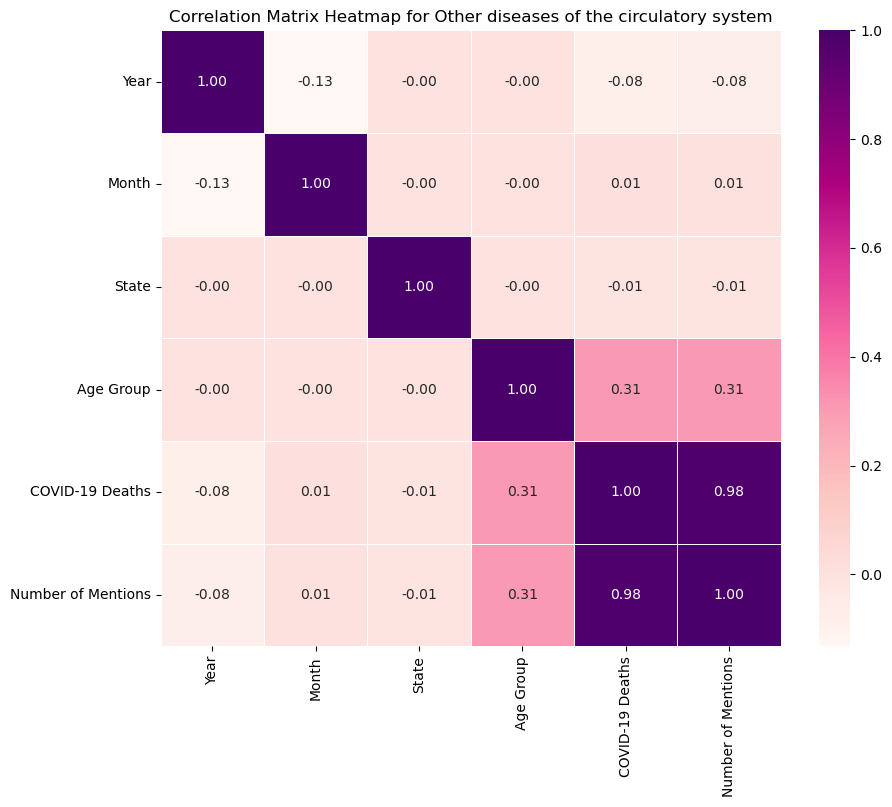

Correlation Matrix for Sepsis:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -1.931483e-13 -1.777901e-14   
Month              -1.322529e-01  1.000000e+00 -7.373883e-15 -1.162213e-16   
State              -1.931483e-13 -7.373883e-15  1.000000e+00 -7.352989e-16   
Age Group          -1.777901e-14 -1.162213e-16 -7.352989e-16  1.000000e+00   
COVID-19 Deaths    -1.018099e-01  1.007948e-02 -3.114584e-02  2.128295e-01   
Number of Mentions -1.029608e-01  1.031709e-02 -3.122888e-02  2.127590e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.101810           -0.102961  
Month                      0.010079            0.010317  
State                     -0.031146           -0.031229  
Age Group                  0.212829            0.212759  
COVID-19 Deaths            1.000000            0.993656  
Number of Mentions         0.993656            1.000000   



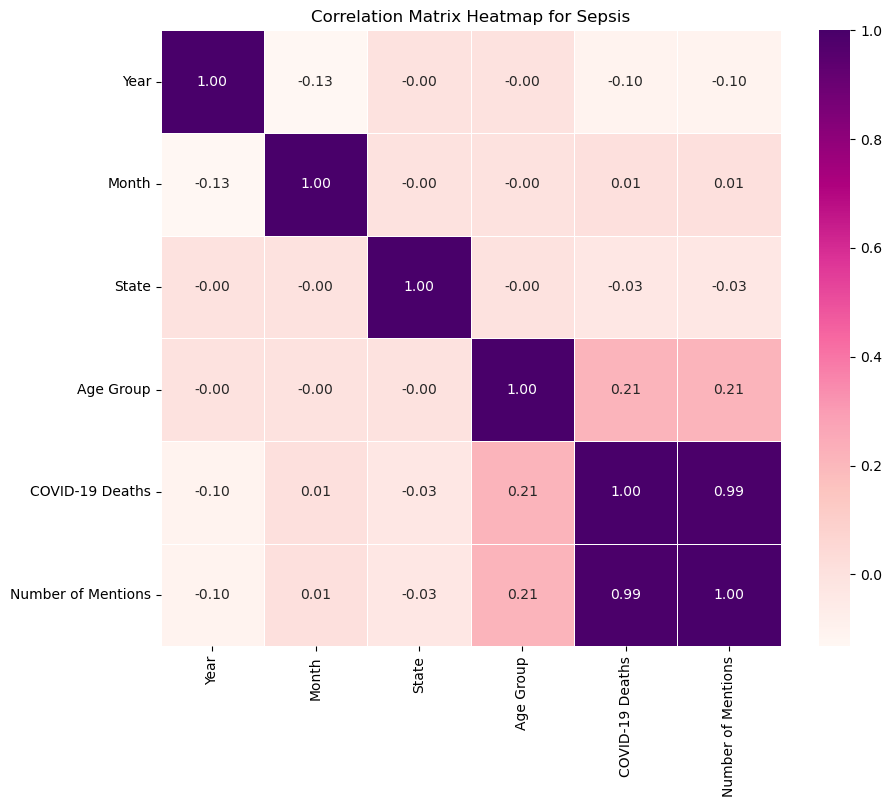

Correlation Matrix for Malignant neoplasms:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -1.931483e-13 -1.777901e-14   
Month              -1.322529e-01  1.000000e+00 -7.373883e-15 -1.162213e-16   
State              -1.931483e-13 -7.373883e-15  1.000000e+00 -7.352989e-16   
Age Group          -1.777901e-14 -1.162213e-16 -7.352989e-16  1.000000e+00   
COVID-19 Deaths    -3.693988e-02 -1.051711e-02 -2.227289e-02  3.444334e-01   
Number of Mentions -2.827474e-02 -1.257870e-02 -1.957426e-02  3.432024e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.036940           -0.028275  
Month                     -0.010517           -0.012579  
State                     -0.022273           -0.019574  
Age Group                  0.344433            0.343202  
COVID-19 Deaths            1.000000            0.970472  
Number of Mentions         0.970472            1.000000   



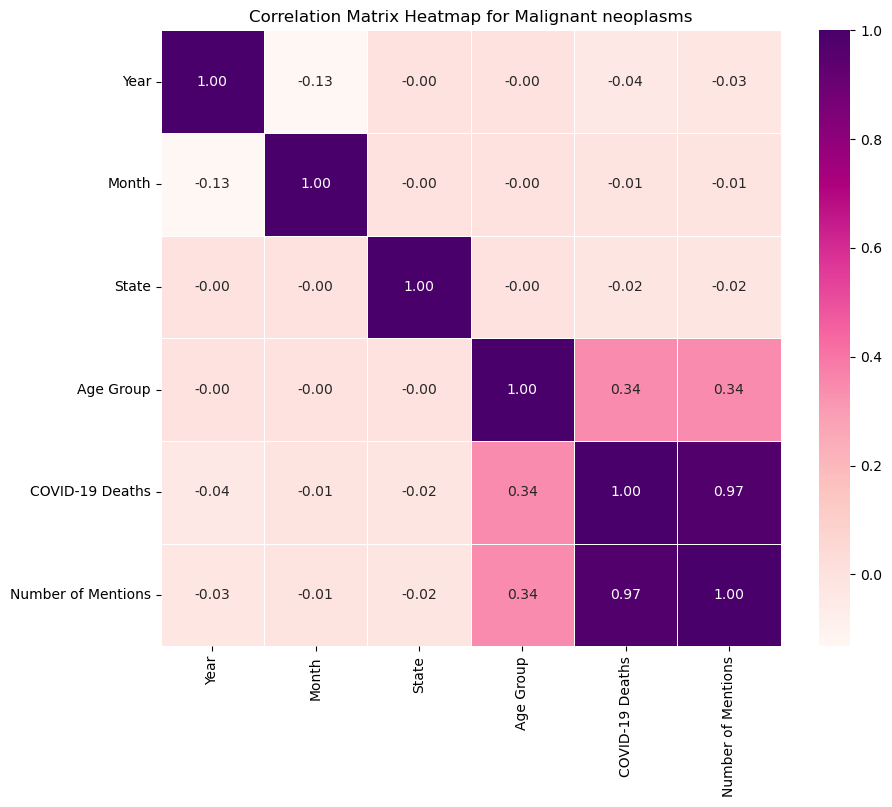

Correlation Matrix for Diabetes:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -1.931483e-13 -1.777901e-14   
Month              -1.322529e-01  1.000000e+00 -7.373883e-15 -1.162213e-16   
State              -1.931483e-13 -7.373883e-15  1.000000e+00 -7.352989e-16   
Age Group          -1.777901e-14 -1.162213e-16 -7.352989e-16  1.000000e+00   
COVID-19 Deaths    -1.246361e-01  1.239834e-02 -2.736133e-02  2.052897e-01   
Number of Mentions -1.243062e-01  1.253456e-02 -2.677546e-02  2.049194e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.124636           -0.124306  
Month                      0.012398            0.012535  
State                     -0.027361           -0.026775  
Age Group                  0.205290            0.204919  
COVID-19 Deaths            1.000000            0.997581  
Number of Mentions         0.997581            1.000000   



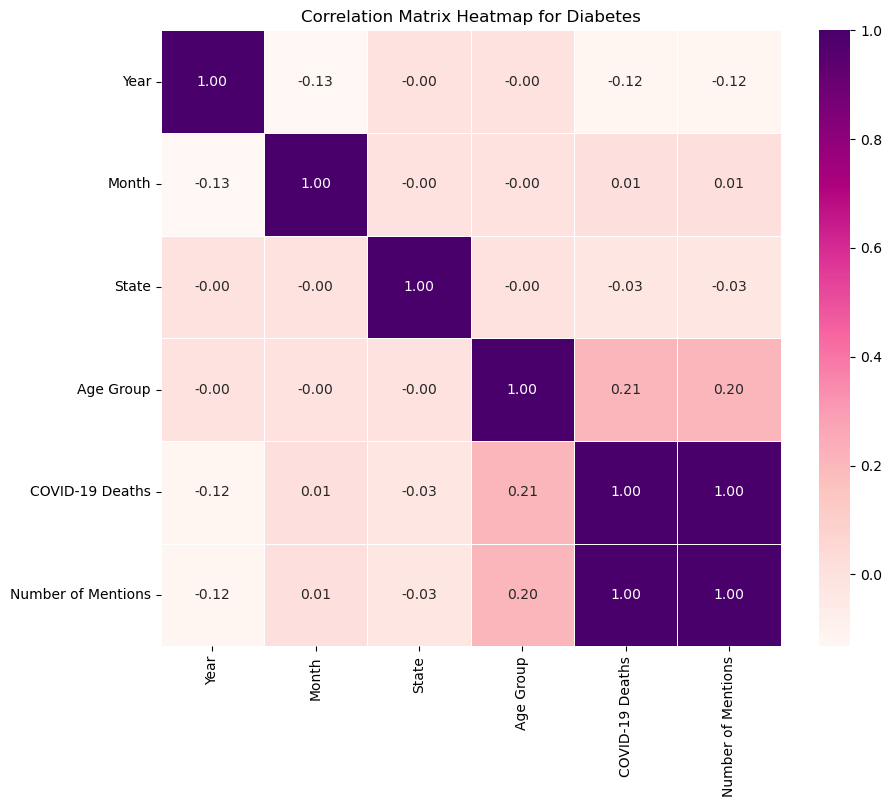

Correlation Matrix for Obesity:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -1.931483e-13 -1.777901e-14   
Month              -1.322529e-01  1.000000e+00 -7.373883e-15 -1.162213e-16   
State              -1.931483e-13 -7.373883e-15  1.000000e+00 -7.352989e-16   
Age Group          -1.777901e-14 -1.162213e-16 -7.352989e-16  1.000000e+00   
COVID-19 Deaths    -1.319449e-01  5.077439e-02 -1.162051e-02  6.773958e-02   
Number of Mentions -1.301100e-01  5.294856e-02 -1.262875e-02  6.568106e-02   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.131945           -0.130110  
Month                      0.050774            0.052949  
State                     -0.011621           -0.012629  
Age Group                  0.067740            0.065681  
COVID-19 Deaths            1.000000            0.973390  
Number of Mentions         0.973390            1.000000   



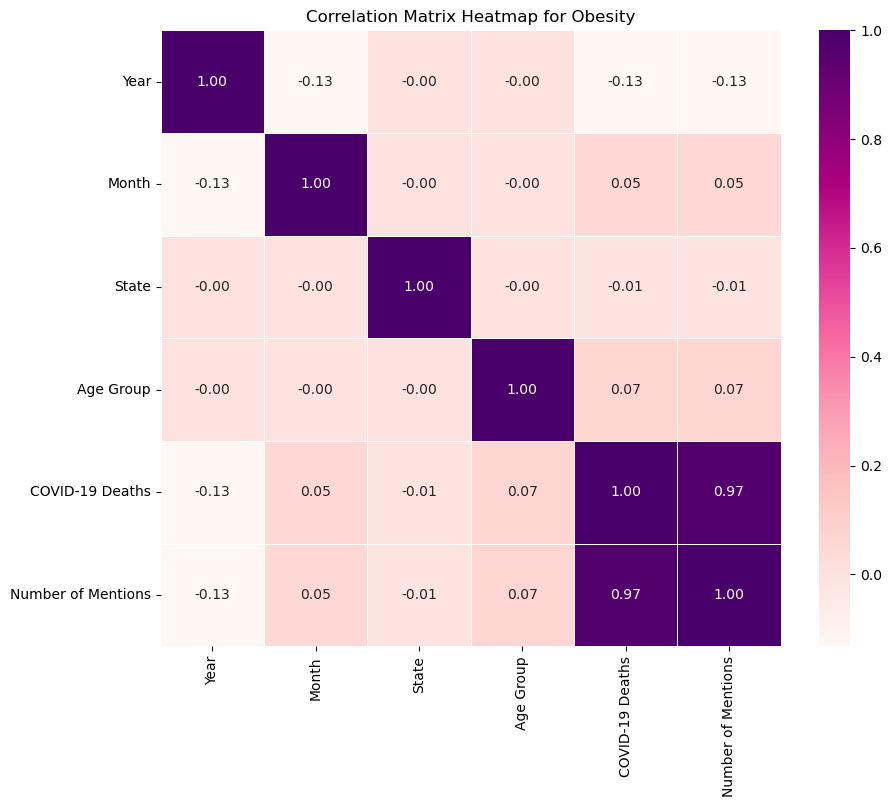

Correlation Matrix for Alzheimer disease:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -1.931483e-13 -1.777901e-14   
Month              -1.322529e-01  1.000000e+00 -7.373883e-15 -1.162213e-16   
State              -1.931483e-13 -7.373883e-15  1.000000e+00 -7.352989e-16   
Age Group          -1.777901e-14 -1.162213e-16 -7.352989e-16  1.000000e+00   
COVID-19 Deaths    -8.386918e-02  2.142507e-02 -1.101882e-02  3.082351e-01   
Number of Mentions -8.275365e-02  2.173425e-02 -8.309064e-03  3.093505e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.083869           -0.082754  
Month                      0.021425            0.021734  
State                     -0.011019           -0.008309  
Age Group                  0.308235            0.309351  
COVID-19 Deaths            1.000000            0.984679  
Number of Mentions         0.984679            1.000000   



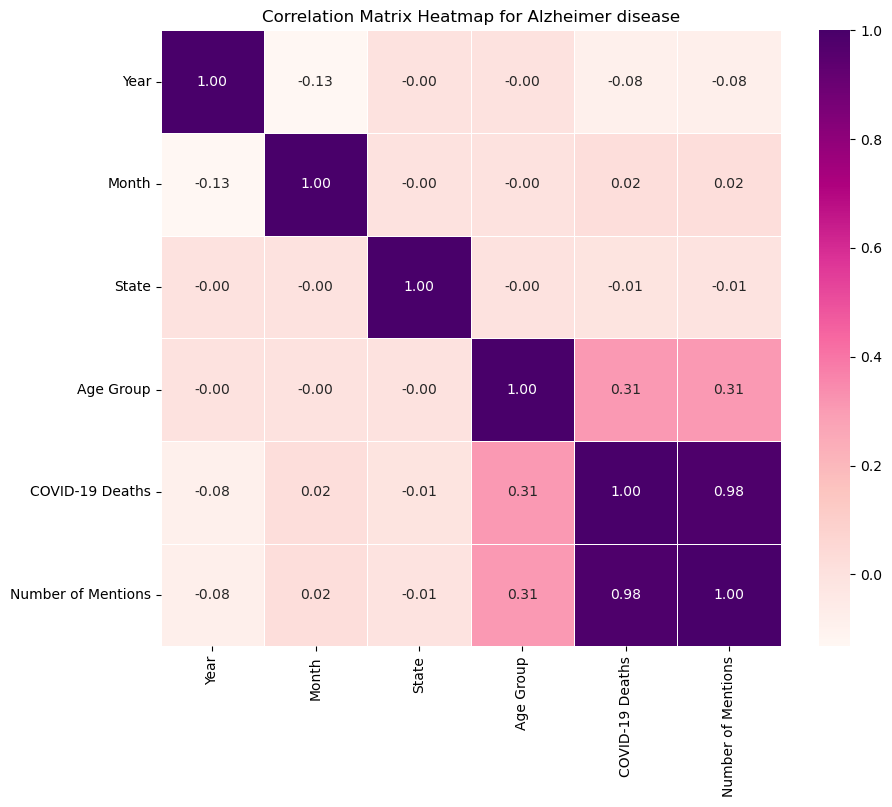

Correlation Matrix for Vascular and unspecified dementia:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -1.931483e-13 -1.777901e-14   
Month              -1.322529e-01  1.000000e+00 -7.373883e-15 -1.162213e-16   
State              -1.931483e-13 -7.373883e-15  1.000000e+00 -7.352989e-16   
Age Group          -1.777901e-14 -1.162213e-16 -7.352989e-16  1.000000e+00   
COVID-19 Deaths    -1.034913e-01  1.376065e-02 -5.649828e-03  3.026679e-01   
Number of Mentions -1.033353e-01  1.396880e-02 -6.760514e-03  3.040477e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.103491           -0.103335  
Month                      0.013761            0.013969  
State                     -0.005650           -0.006761  
Age Group                  0.302668            0.304048  
COVID-19 Deaths            1.000000            0.997092  
Number of Mentions         0.997092           

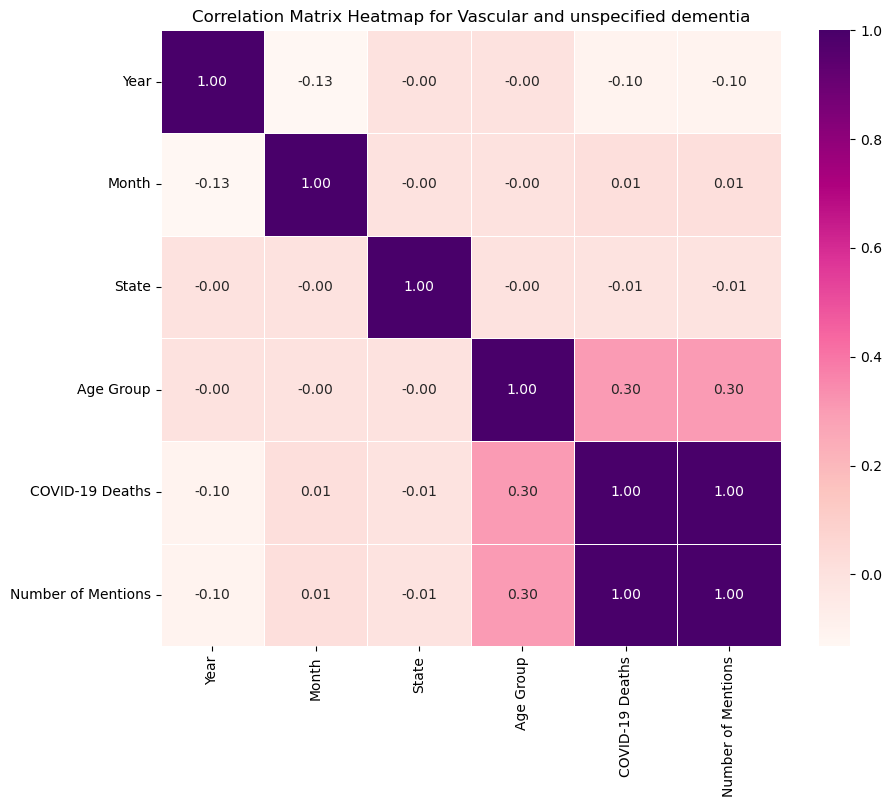

Correlation Matrix for Renal failure:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -1.931483e-13 -1.777901e-14   
Month              -1.322529e-01  1.000000e+00 -7.373883e-15 -1.162213e-16   
State              -1.931483e-13 -7.373883e-15  1.000000e+00 -7.352989e-16   
Age Group          -1.777901e-14 -1.162213e-16 -7.352989e-16  1.000000e+00   
COVID-19 Deaths    -9.155750e-02 -8.070218e-04 -1.204530e-02  2.432725e-01   
Number of Mentions -9.155062e-02 -8.731890e-04 -9.411625e-03  2.452910e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.091558           -0.091551  
Month                     -0.000807           -0.000873  
State                     -0.012045           -0.009412  
Age Group                  0.243272            0.245291  
COVID-19 Deaths            1.000000            0.994445  
Number of Mentions         0.994445            1.000000   



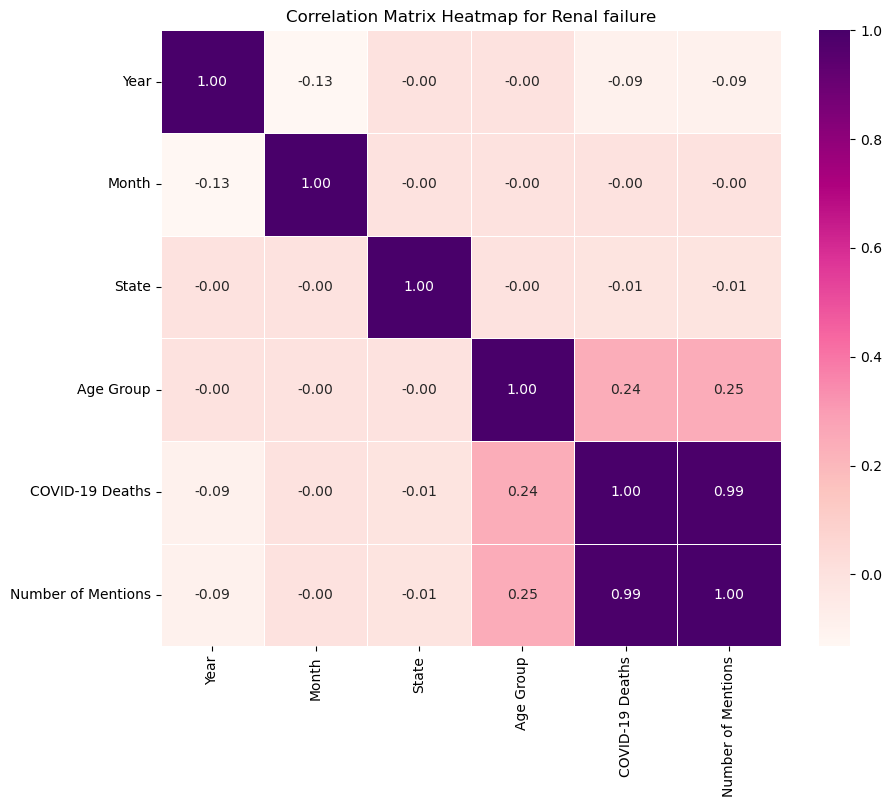

Correlation Matrix for Intentional and unintentional injury, poisoning, and other adverse events:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -1.931483e-13 -1.777901e-14   
Month              -1.322529e-01  1.000000e+00 -7.373883e-15 -1.162213e-16   
State              -1.931483e-13 -7.373883e-15  1.000000e+00 -7.352989e-16   
Age Group          -1.777901e-14 -1.162213e-16 -7.352989e-16  1.000000e+00   
COVID-19 Deaths    -4.914990e-02 -1.721979e-03 -1.722689e-02  2.978825e-01   
Number of Mentions -5.006574e-02 -1.329807e-02 -2.223270e-02  2.828850e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.049150           -0.050066  
Month                     -0.001722           -0.013298  
State                     -0.017227           -0.022233  
Age Group                  0.297882            0.282885  
COVID-19 Deaths            1.000000            0.877036  
Number

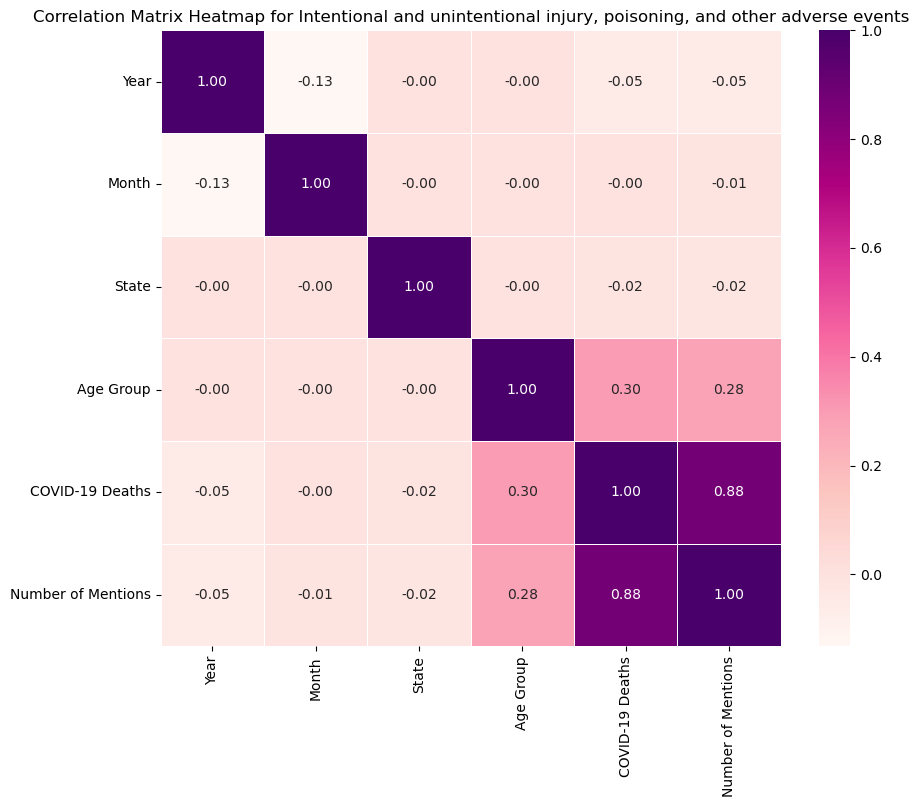

Correlation Matrix for All other conditions and causes (residual):
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -1.931483e-13 -1.777901e-14   
Month              -1.322529e-01  1.000000e+00 -7.373883e-15 -1.162213e-16   
State              -1.931483e-13 -7.373883e-15  1.000000e+00 -7.352989e-16   
Age Group          -1.777901e-14 -1.162213e-16 -7.352989e-16  1.000000e+00   
COVID-19 Deaths    -1.150886e-01  1.720895e-02 -7.505072e-03  2.973154e-01   
Number of Mentions -1.078613e-01  1.562078e-02  2.149922e-03  3.080596e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.115089           -0.107861  
Month                      0.017209            0.015621  
State                     -0.007505            0.002150  
Age Group                  0.297315            0.308060  
COVID-19 Deaths            1.000000            0.995446  
Number of Mentions         0.995446  

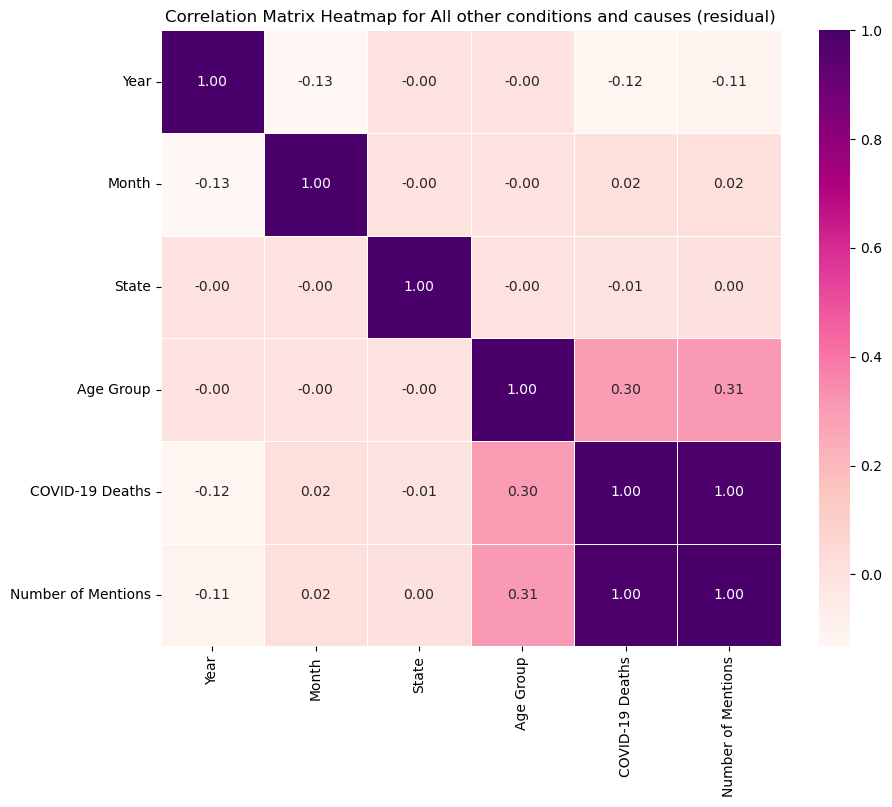

Correlation Matrix for COVID-19:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -1.931483e-13 -1.777901e-14   
Month              -1.322529e-01  1.000000e+00 -7.373883e-15 -1.162213e-16   
State              -1.931483e-13 -7.373883e-15  1.000000e+00 -7.352989e-16   
Age Group          -1.777901e-14 -1.162213e-16 -7.352989e-16  1.000000e+00   
COVID-19 Deaths    -1.292669e-01  1.488408e-02 -2.077474e-02  2.684287e-01   
Number of Mentions -1.291894e-01  1.486337e-02 -2.067058e-02  2.684795e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.129267           -0.129189  
Month                      0.014884            0.014863  
State                     -0.020775           -0.020671  
Age Group                  0.268429            0.268479  
COVID-19 Deaths            1.000000            0.999939  
Number of Mentions         0.999939            1.000000   



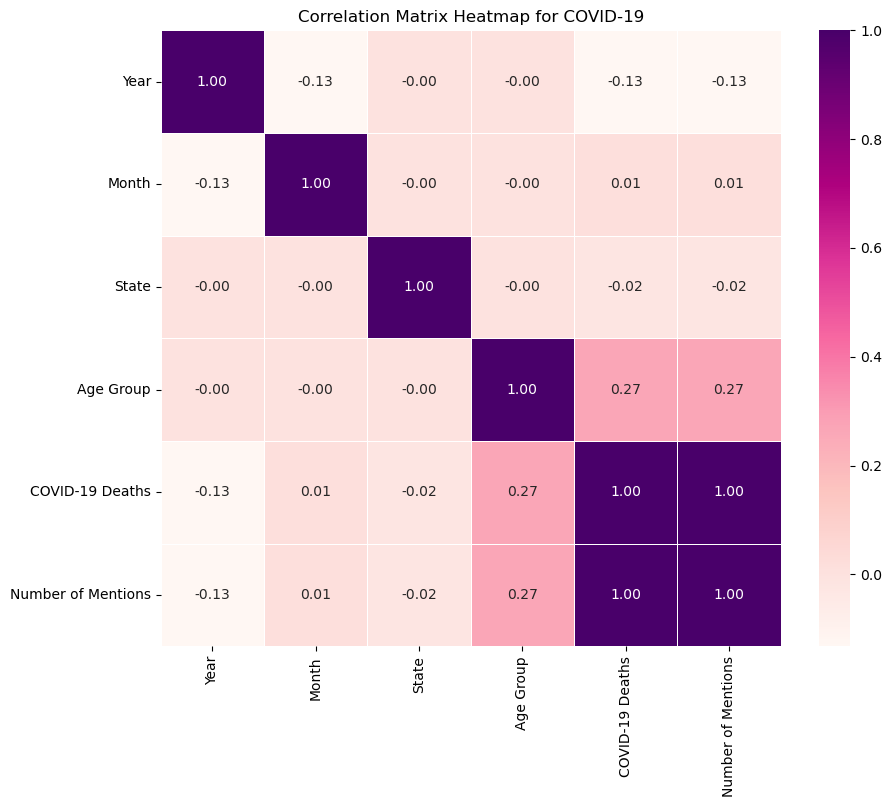

In [17]:
# Use a "for loop" to calculated the correlations for each condition and create heetmap
for condition in conditions:
    df_condition = df_selected[df_selected['Condition'] == condition]
    df_condition_encoded = df_encoded[df_selected['Condition'] == condition]
    if df_condition_encoded.shape[0] > 1:
        numeric_df = df_condition_encoded.select_dtypes(include=[np.number])
        numeric_df = numeric_df.loc[:, numeric_df.var() != 0.0]
        corr_matrix = numeric_df.corr()
        
        # Print correlation matrix for each condition
        print(f'Correlation Matrix for {condition}:\n', corr_matrix, '\n')
        
        # Plot heetmap for each condition
        plt.figure(figsize=(10,8))
        sns.heatmap(corr_matrix, annot=True, cmap='RdPu', fmt='.2f', linewidths=0.5)
        plt.title(f'Correlation Matrix Heatmap for {condition}')
        heatmap_condition = plt.gcf()
        plt.show()
        
        # Export the heatmaps
        heatmap_condition.savefig(os.path.join(path, '04 Analysis', 'Visualizations', f'heatmap_corr_matrix_{condition.replace(" ", "_").lower()}.png'))

### Top 10 strongest positive correlations for specific conditions:
### Influenza and Pneumonia
COVID-19 Deaths and Number of Mentions: 0.999627
### Cardiac arrest 
COVID-19 Deaths and Number of Mentions: 0.997826
### Diabets
COVID-19 Deaths and Number of Mentions: 0.997581
### Vascular and unspecified dementia
COVID-19 Deaths and Number of Mentions: 0.997092
### Ischemic heart disease
COVID-19 Deaths and Number of Mentions: 0.994934
### Renal failure
COVID-19 Deaths and Number of Mentions: 0.994445
### Adult respiratory distress syndrome
COVID-19 Deaths and Number of Mentions: 0.993687
### Cardiac arrhythmia
COVID-19 Deaths and Number of Mentions: 0.991258
### Heart failure
COVID-19 Deaths and Number of Mentions: 0.990584
### Cerebrovascular diseases
COVID-19 Deaths and Number of Mentions: 0.974335

### Strongest negative correlations to specific conditions:
### Adult respiratory distress syndrome
COVID-19 Deaths and Year: -0.164269           

Number of Mentions and Year: -0.165661 
### Obesity
COVID-19 Deaths and Year: -0.131945            

Number of Mentions and Year: -0.130110
### COVID-19
COVID-19 Deaths and Year: -0.129267           

Number of Mentions and Year: -0.129189 
### Diabetes
COVID-19 Deaths and Year: -0.124636           

Number of Mentions and Year: -0.124306 
### Influenza and pneumonia
COVID-19 Deaths and Year: -0.123822           

Number of Mentions and Year: -0.123505
### Rental failure
COVID-19 Deaths and Year: -0.091558            

Number of Mentions and Year: -0.091551
### Cerebrovascular diseses
COVID-19 Deaths and Year: -0.086577            

Number of Mentions and Year: -0.087495
### Alzheimer disease
COVID-19 Deaths and Year: -0.083869           

Number of Mentions and Year: -0.082754
### Cardiac arrhythmia
COVID-19 Deaths and Year: -0.081916            

Number of Mentions and Year: -0.081245
### Other diesses of the circulatory system
COVID-19 Deaths and Year: -0.061105

Number of Mentions and Year: -0.081245
### Insights into the Correlation of the Column Variables
A very strong positive corretion between COVID-19 and Number of Mentions (0.99) represents the higher mentions of COVID-19 related condition correspond closely to increases death ratio. The moderate positive correlation between  Condition and Condition Group (0.65).
### Insights into the Correlations of Specific Medical Conditions in the "Condition" Variable.
Specific medical conditions have very strong correlation with COVID-19 Deaths and Number of Mentions. Conditions like influenza and pnemonia, vascular ans unspecified dementia, and diabetes show higher corrleation of 0.99. Moderate positive correlation between with for conditions like ischemic heart disease (0.30) and cerebrovascular diseases (0.34). Weak negative correlation with year for some conditions a slight decrease.

# 5. Create Scatterplots 

### Create Scatterplot with strongest correlations among the columns.

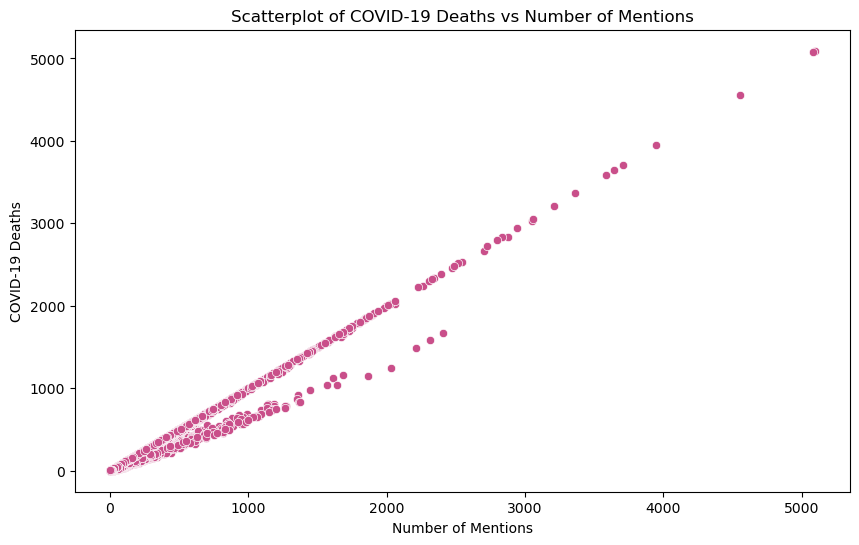

In [18]:
# Scatterplot for COVID-19 Deaths and Number of Mentions
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_selected, x='Number of Mentions', y='COVID-19 Deaths', color = '#c94f8a')
plt.title('Scatterplot of COVID-19 Deaths vs Number of Mentions')
plt.xlabel('Number of Mentions')
plt.ylabel('COVID-19 Deaths')
scatterplot_mentions_deaths = plt.gcf()
plt.show()

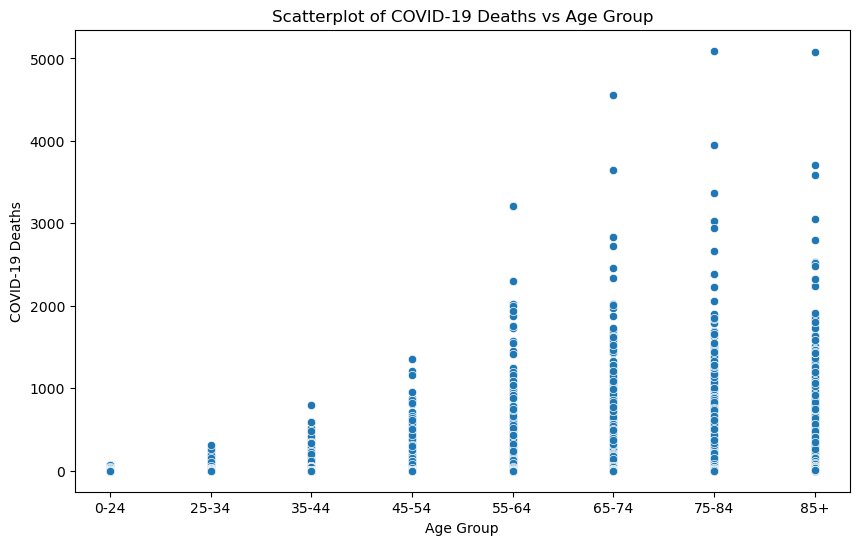

In [19]:
# Scatterplot for Age Group and COVID-19 Deaths
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_selected, x='Age Group', y='COVID-19 Deaths')
plt.title('Scatterplot of COVID-19 Deaths vs Age Group')
plt.xlabel('Age Group')
plt.ylabel('COVID-19 Deaths')
scatterplot_agegroup_deaths = plt.gcf()
plt.show()

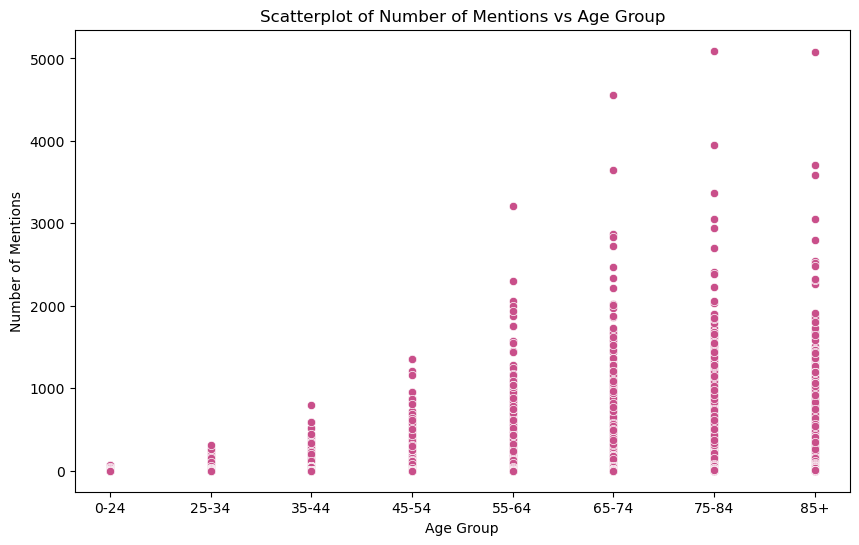

In [20]:
# Scatterplot for Age Group and Number of Mentions
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_selected, x='Age Group', y='Number of Mentions', color = '#c94f8a')
plt.title('Scatterplot of Number of Mentions vs Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Mentions')
scatterplot_mentions_agegroup = plt.gcf()
plt.show()

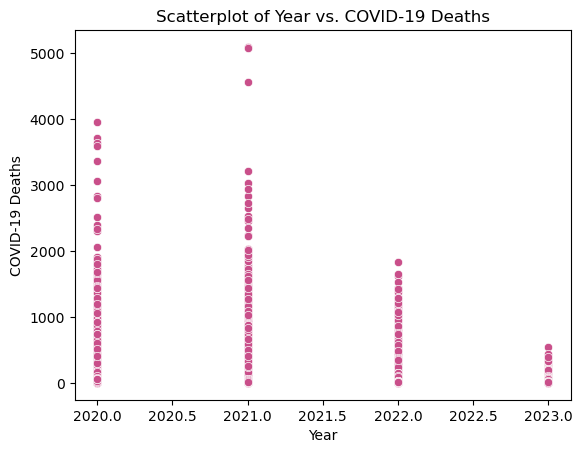

In [21]:
# Scatterplot for Year and COVID-19 Deaths
sns.scatterplot(data=df_selected, x='Year', y='COVID-19 Deaths', color = '#c94f8a')
plt.title('Scatterplot of Year vs. COVID-19 Deaths')
plt.xlabel('Year')
plt.ylabel('COVID-19 Deaths')
scatterplot_year_deaths = plt.gcf()
plt.show()

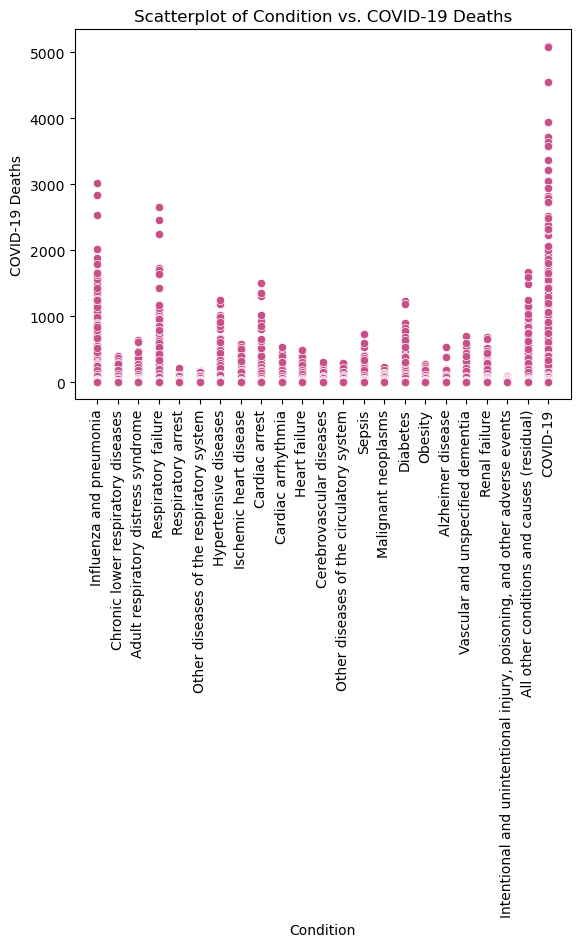

In [22]:
# Scatterplot for Condtion and COVID-19 Deaths
sns.scatterplot(data=df_selected, x='Condition', y='COVID-19 Deaths', color = '#c94f8a')
plt.title('Scatterplot of Condition vs. COVID-19 Deaths')
plt.xlabel('Condition')
plt.ylabel('COVID-19 Deaths')
plt.xticks(rotation=90)
scatterplot_condition_deaths = plt.gcf()
plt.show()

### Create Scatterplots for top 5 positive correlations for specificmedical conditions.

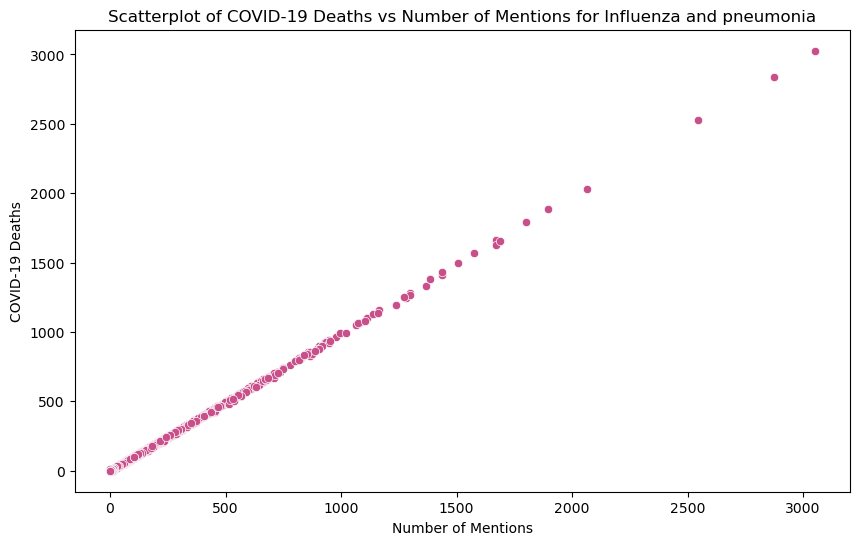

In [23]:
# Scatterplot for Influenza and pneumonia
condition = 'Influenza and pneumonia'
df_condition = df_selected[df_selected['Condition'] == condition]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_condition, x='Number of Mentions', y='COVID-19 Deaths', color = '#c94f8a')
plt.title(f'Scatterplot of COVID-19 Deaths vs Number of Mentions for {condition}')
plt.xlabel('Number of Mentions')
plt.ylabel('COVID-19 Deaths')
scatterplot_influenza_pneumonia = plt.gcf()
plt.show()

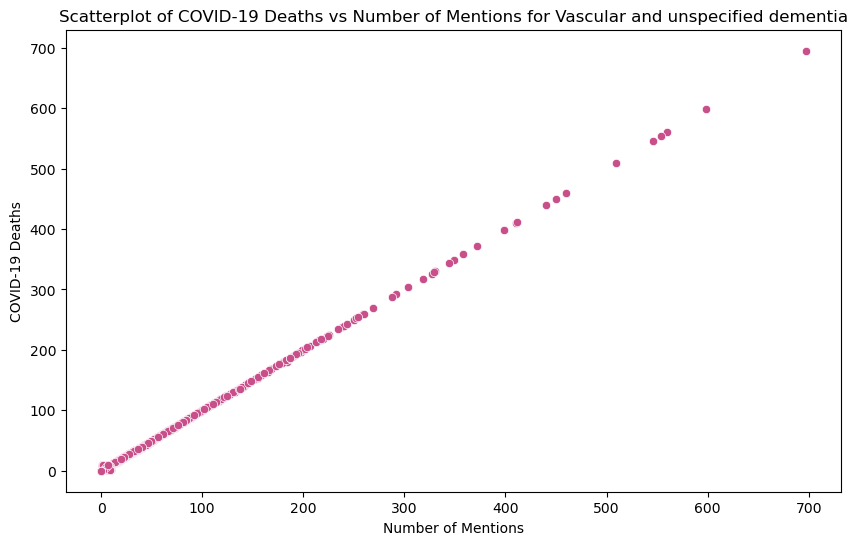

In [24]:
# Scatterplot for Vascular and unspecified dementia
condition = 'Vascular and unspecified dementia'
df_condition = df_selected[df_selected['Condition'] == condition]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_condition, x='Number of Mentions', y='COVID-19 Deaths', color = '#c94f8a')
plt.title(f'Scatterplot of COVID-19 Deaths vs Number of Mentions for {condition}')
plt.xlabel('Number of Mentions')
plt.ylabel('COVID-19 Deaths')
scatterplot_vascular_dementia = plt.gcf()
plt.show()

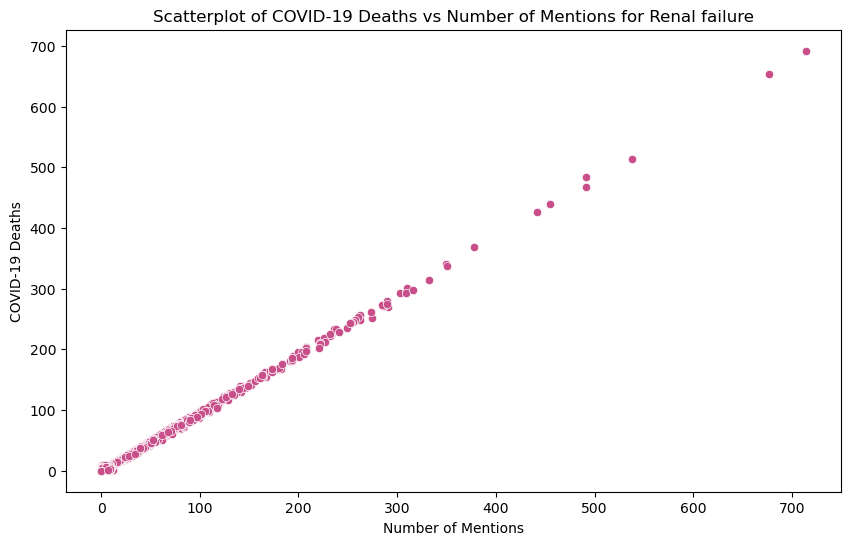

In [25]:
# Scatterplot for Renal failure
condition = 'Renal failure'
df_condition = df_selected[df_selected['Condition'] == condition]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_condition, x='Number of Mentions', y='COVID-19 Deaths', color = '#c94f8a')
plt.title(f'Scatterplot of COVID-19 Deaths vs Number of Mentions for {condition}')
plt.xlabel('Number of Mentions')
plt.ylabel('COVID-19 Deaths')
scatterplot_renal_failure = plt.gcf()
plt.show()

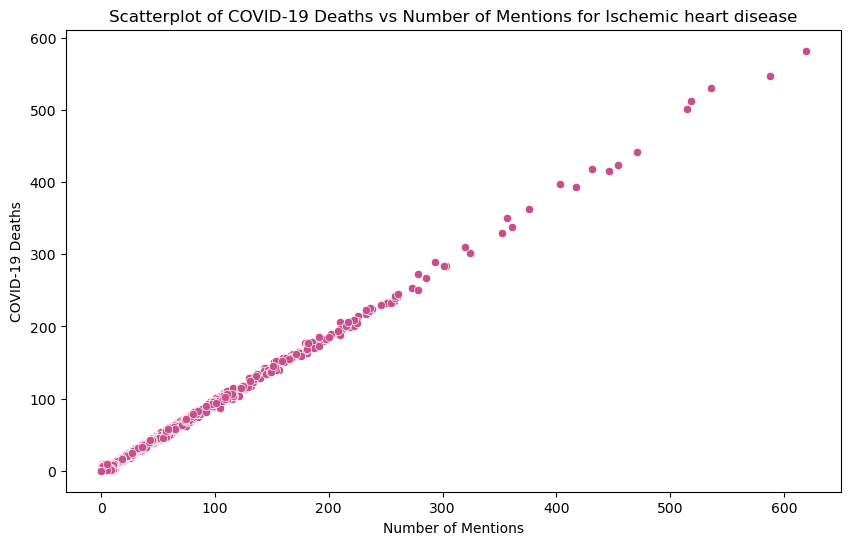

In [26]:
# Scatterplot for Ischemic heart disease
condition = 'Ischemic heart disease'
df_condition = df_selected[df_selected['Condition'] == condition]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_condition, x='Number of Mentions', y='COVID-19 Deaths', color = '#c94f8a')
plt.title(f'Scatterplot of COVID-19 Deaths vs Number of Mentions for {condition}')
plt.xlabel('Number of Mentions')
plt.ylabel('COVID-19 Deaths')
scatterplot_ischemic_heart_disease = plt.gcf()
plt.show()

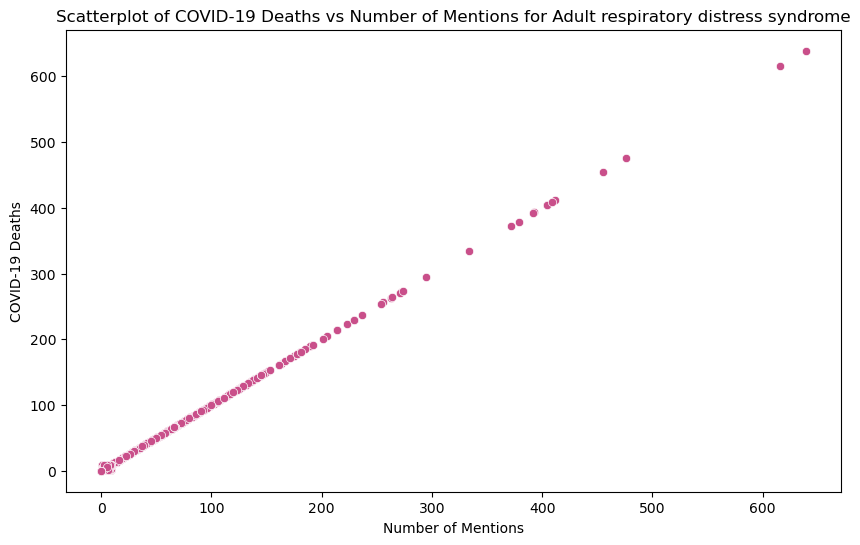

In [27]:
# Scatterplot for Adult respiratory distress syndrome
condition = 'Adult respiratory distress syndrome'
df_condition = df_selected[df_selected['Condition'] == condition]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_condition, x='Number of Mentions', y='COVID-19 Deaths', color = '#c94f8a')
plt.title(f'Scatterplot of COVID-19 Deaths vs Number of Mentions for {condition}')
plt.xlabel('Number of Mentions')
plt.ylabel('COVID-19 Deaths')
scatterplot_respiratory_distress = plt.gcf()
plt.show()

### Create Scatterplots for top 5 negative correlations for specificmedical conditions.

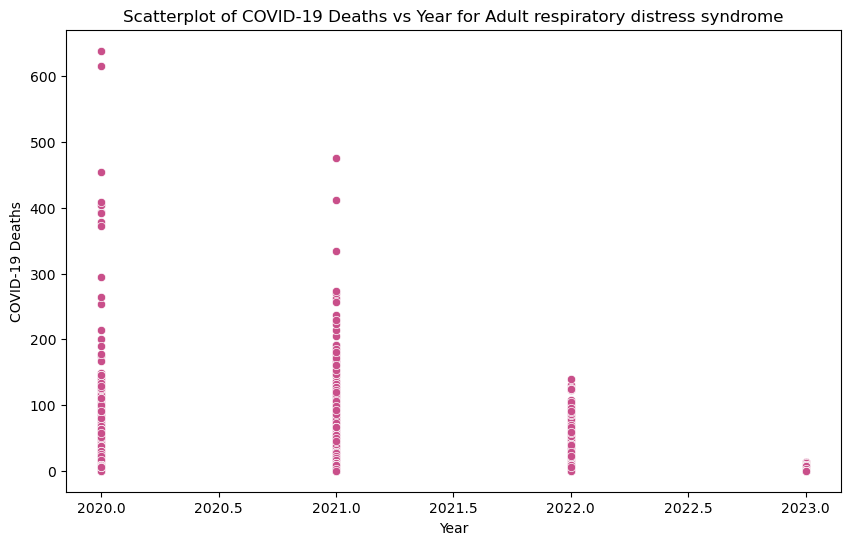

In [28]:
# Scatterplot for Adult respiratory distress syndrome - COVID-19 Deaths and Year
condition = 'Adult respiratory distress syndrome'
df_condition = df_selected[df_selected['Condition'] == condition]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_condition, x='Year', y='COVID-19 Deaths', color = '#c94f8a')
plt.title(f'Scatterplot of COVID-19 Deaths vs Year for {condition}')
plt.xlabel('Year')
plt.ylabel('COVID-19 Deaths')
scatterplot_respiratory_distress_year = plt.gcf()
plt.show()

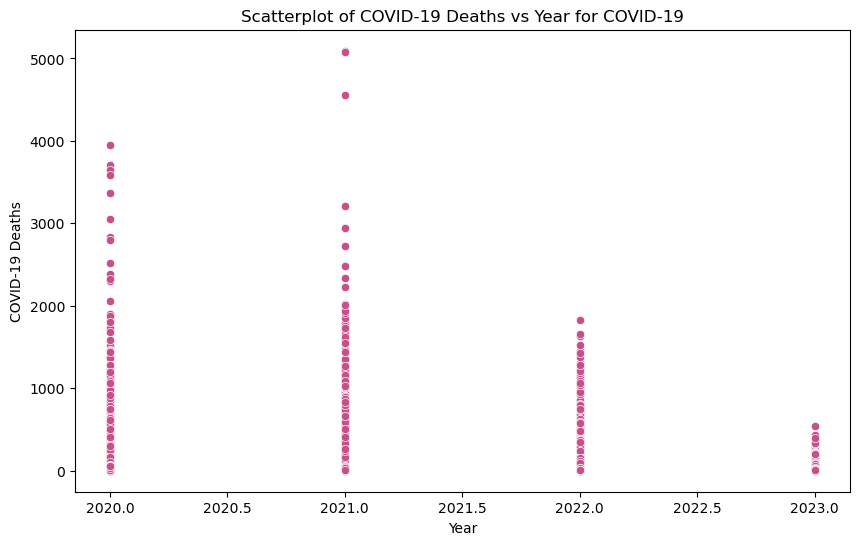

In [29]:
# Scatterplot for COVID-19 - COVID-19 Deaths and Year
condition = 'COVID-19'
df_condition = df_selected[df_selected['Condition'] == condition]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_condition, x='Year', y='COVID-19 Deaths', color = '#c94f8a')
plt.title(f'Scatterplot of COVID-19 Deaths vs Year for {condition}')
plt.xlabel('Year')
plt.ylabel('COVID-19 Deaths')
scatterplot_covid19_year = plt.gcf()
plt.show()

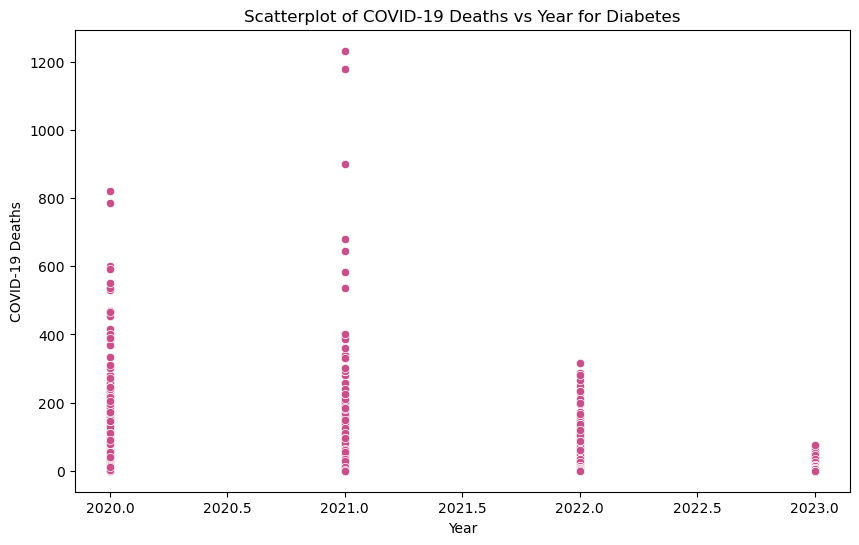

In [30]:
# Scatterplot for Diabetes - COVID-19 Deaths and Year
condition = 'Diabetes'
df_condition = df_selected[df_selected['Condition'] == condition]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_condition, x='Year', y='COVID-19 Deaths', color = '#c94f8a')
plt.title(f'Scatterplot of COVID-19 Deaths vs Year for {condition}')
plt.xlabel('Year')
plt.ylabel('COVID-19 Deaths')
scatterplot_diabetes_year = plt.gcf()
plt.show()

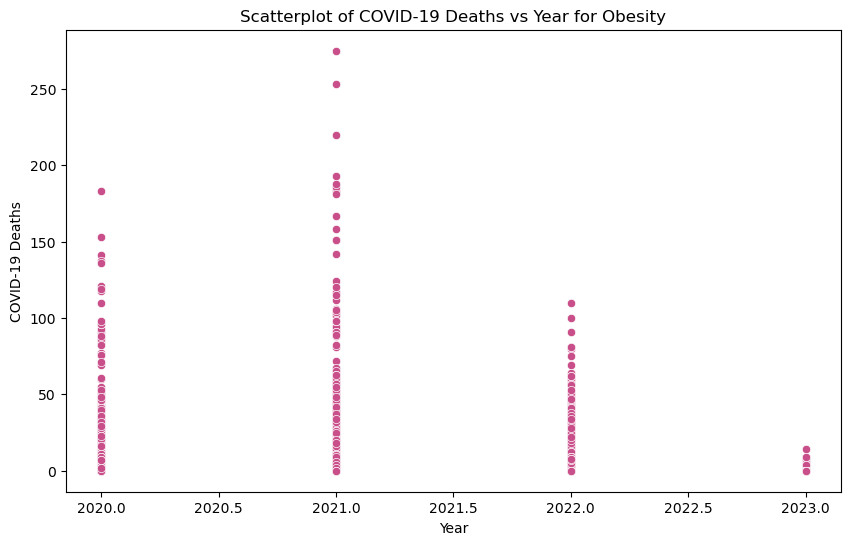

In [31]:
# Scatterplot for Obesity - COVID-19 Deaths and Year
condition = 'Obesity'
df_condition = df_selected[df_selected['Condition'] == condition]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_condition, x='Year', y='COVID-19 Deaths', color = '#c94f8a')
plt.title(f'Scatterplot of COVID-19 Deaths vs Year for {condition}')
plt.xlabel('Year')
plt.ylabel('COVID-19 Deaths')
scatterplot_obesity_year = plt.gcf()
plt.show()

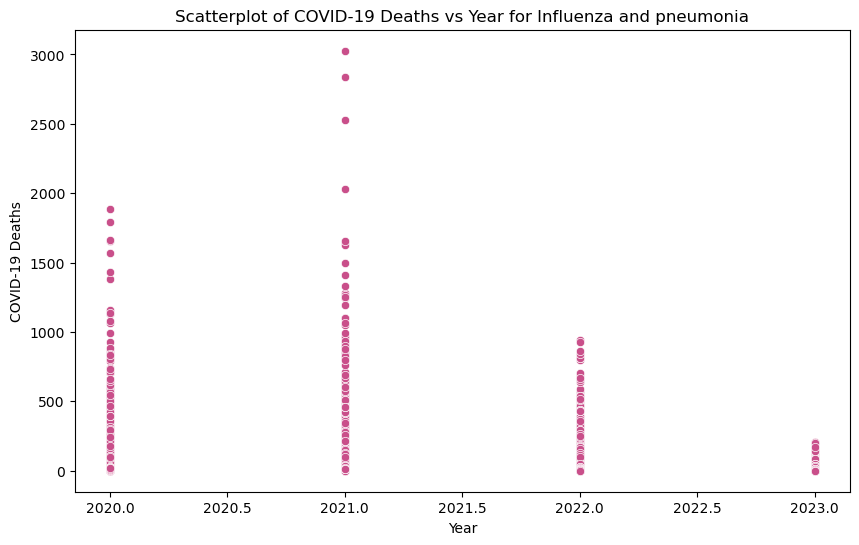

In [32]:
# Scatterplot for Influenza and pneumonia - COVID-19 Deaths and Year
condition = 'Influenza and pneumonia'
df_condition = df_selected[df_selected['Condition'] == condition]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_condition, x='Year', y='COVID-19 Deaths', color = '#c94f8a')
plt.title(f'Scatterplot of COVID-19 Deaths vs Year for {condition}')
plt.xlabel('Year')
plt.ylabel('COVID-19 Deaths')
scatterplot_influenza_year = plt.gcf()
plt.show()

### Insights from the Scatterplot Analysis
The scatterplot of COVID-19 Deaths vs. Number of Mentions represents postive strong correlation. Age Group vs. COVID-19 Deaths and Age Grop vs. Number of Mentions represent outcomes. it's clearly reprents older age group have a highr deaths counts mentions and older age group highly affected by COVID-19. The scatterplot of Year vs. COVOD-19 Deaths reprents variability over time.

The Scatterplot of COVID-19 Deaths vs. Number of mentions for conditions like influenza and pneumonia, vascular ans unspecified dementia, ans ischemic heart disease have strong positive relation and it's represents highest COVID-19 Deaths counts. COVID-19 Deaths vs. Year for conditions represents weak negative relation and suggests slight deacrese death over time. COVID-19 vs. Age Group for conditions like cardiac arreset and renal failure scatterplot represents older age group have higher death counts.

# 6. Create a Pair Plot

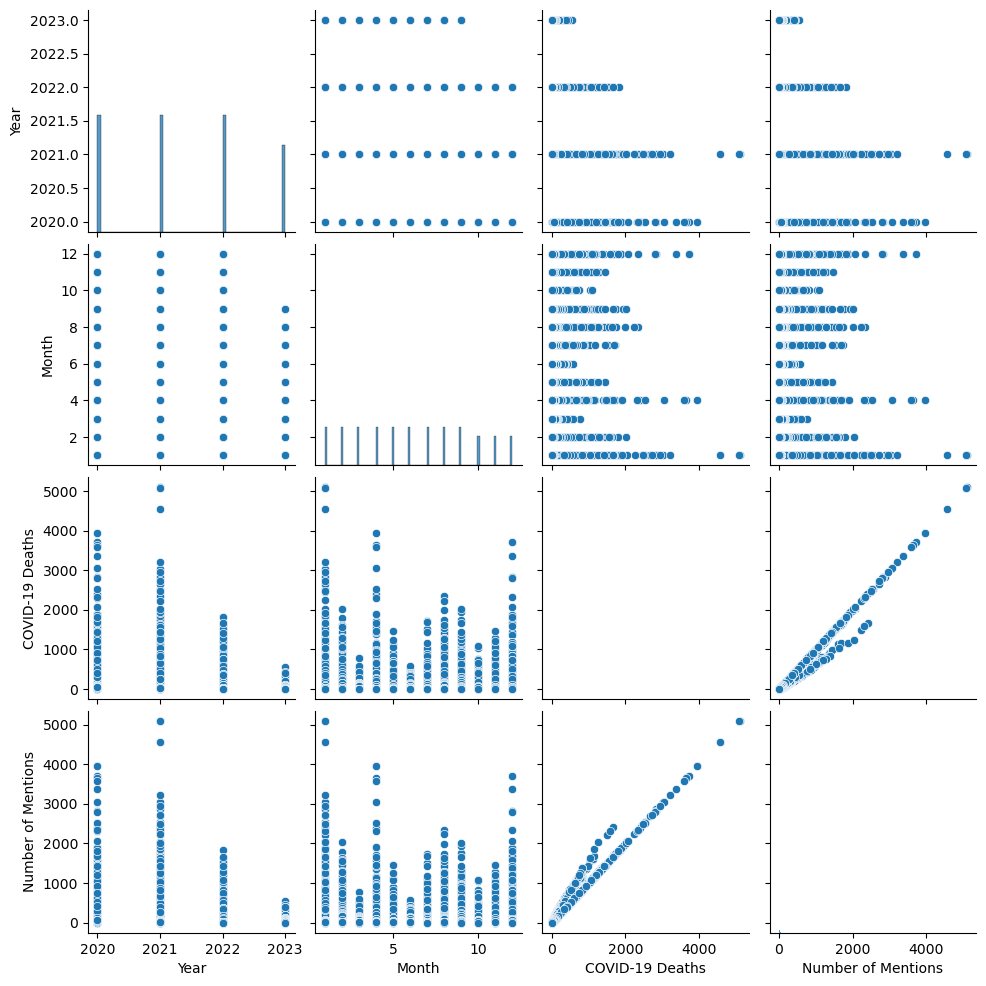

In [33]:
# Create a Pair Plot of the entire dataset
sns.pairplot(df_cov_19)
pair_plot_entire_dataset = plt.gcf()
plt.show()

### Create pair plots for specific medical conditions feom the "Condition" column.

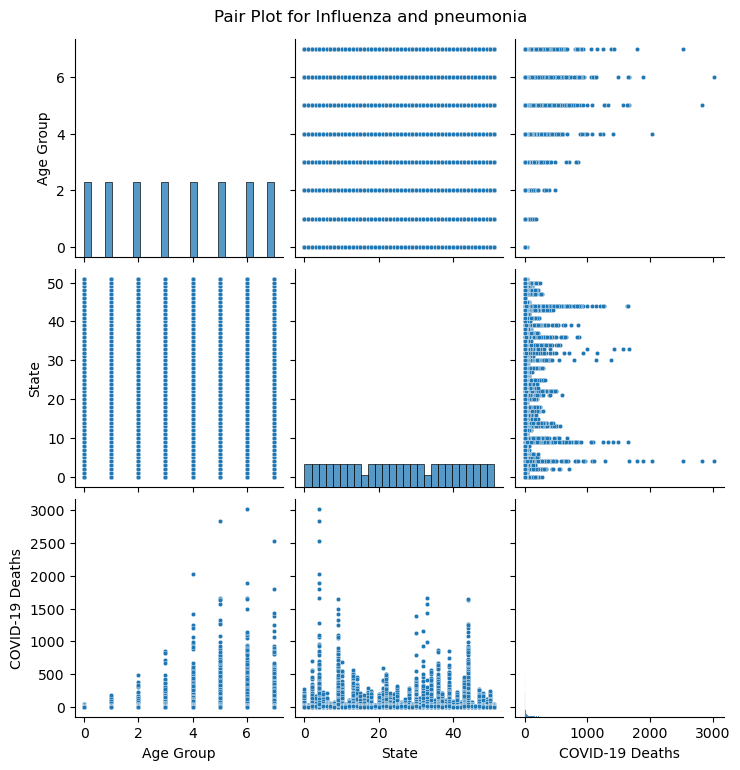

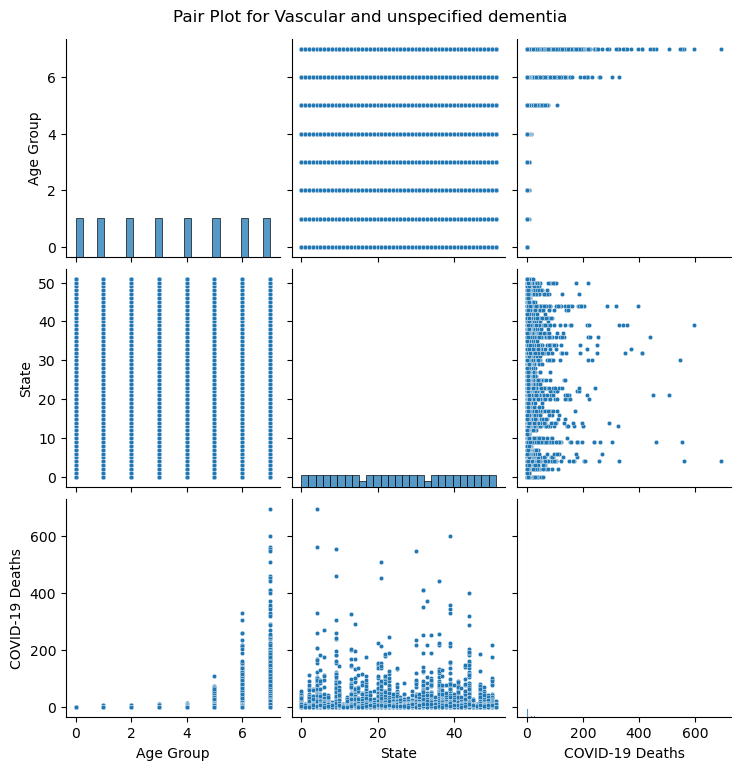

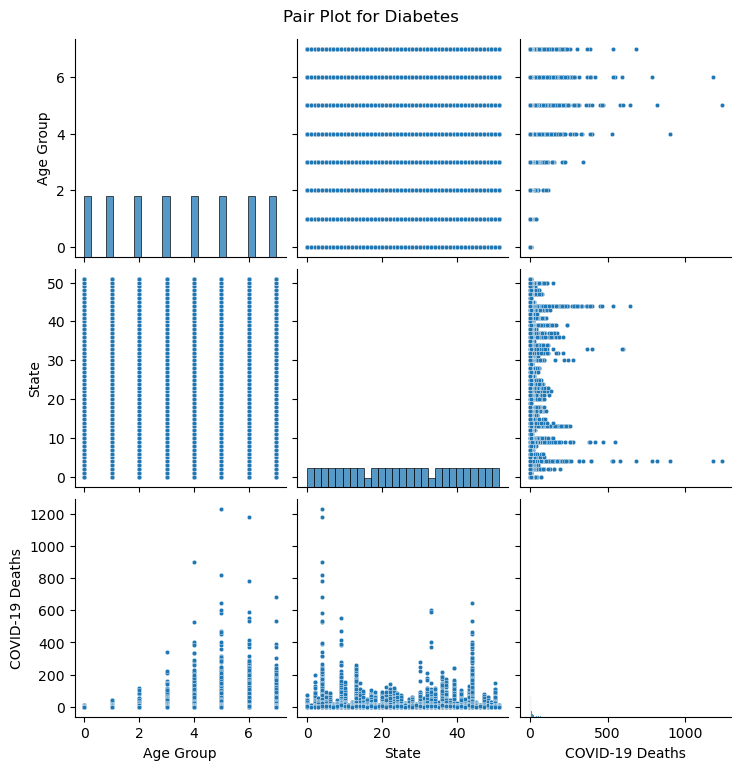

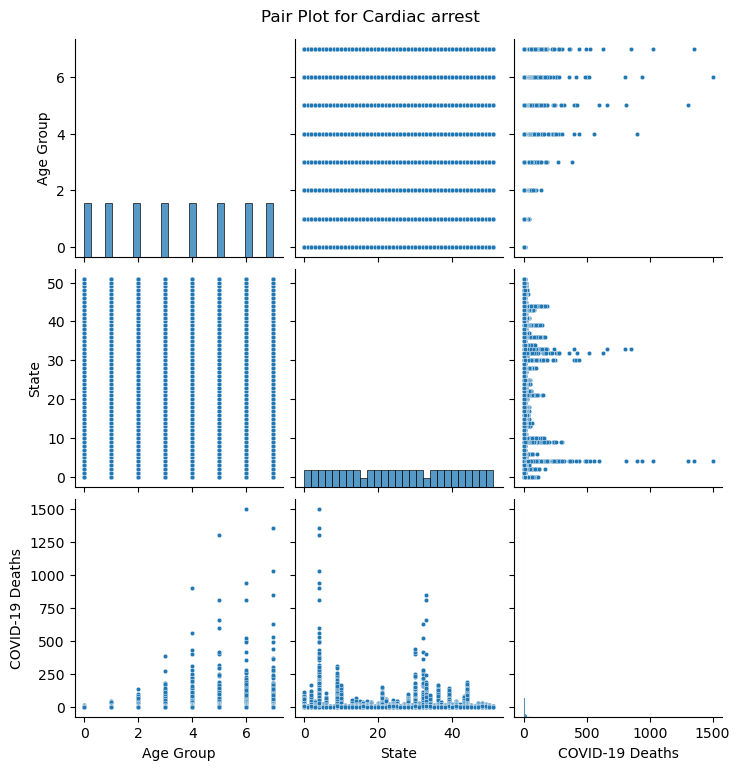

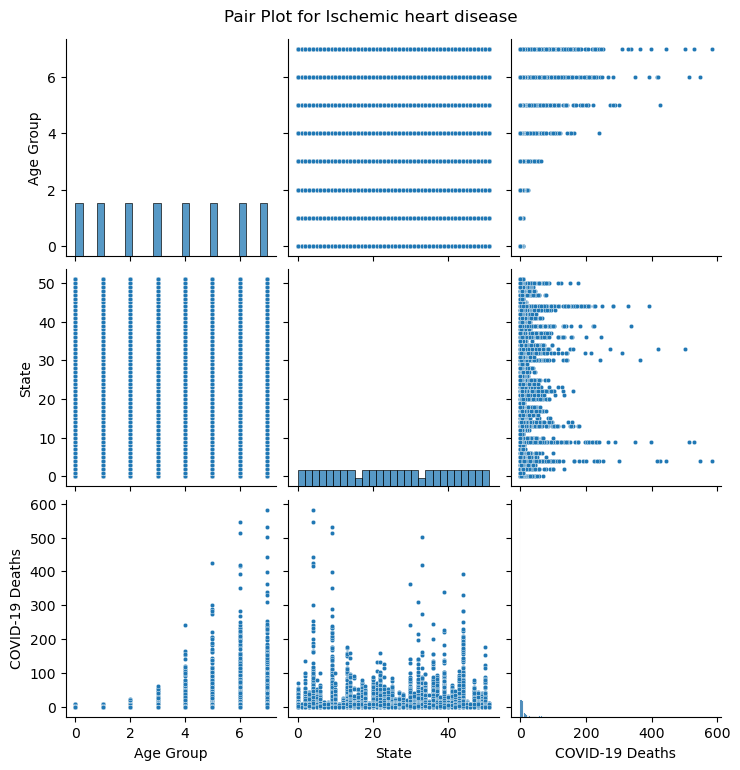

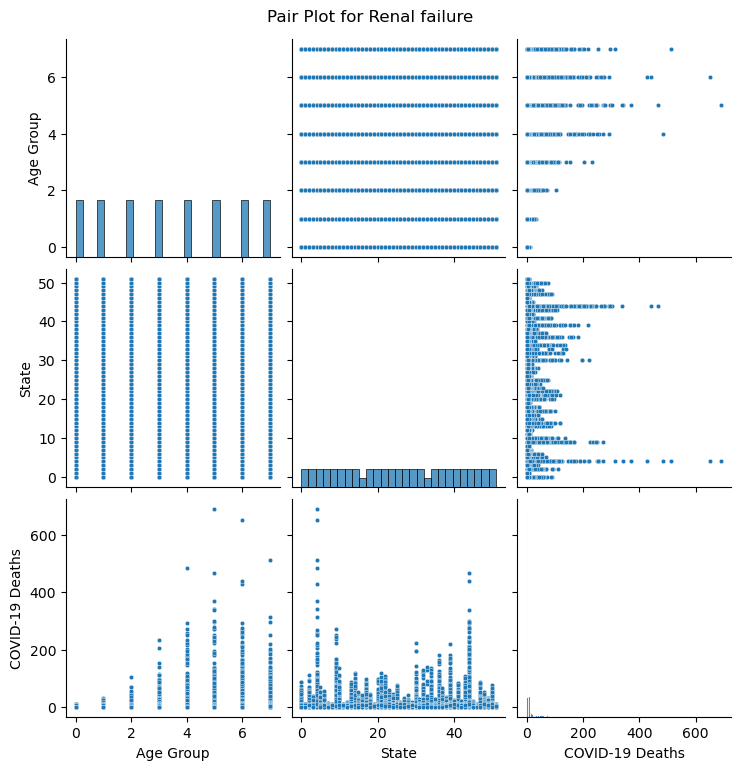

In [34]:
# Select columns to pair with
pair_plot_columns = ['Age Group', 'State', 'COVID-19 Deaths']

# Filter the dataframe for the selected conditions
conditions_for_pair_plot = ['Influenza and pneumonia', 'Vascular and unspecified dementia', 'Diabetes', 'Cardiac arrest', 'Ischemic heart disease', 'Renal failure']
df_pair_plot_conditions = df_selected[df_selected['Condition'].isin(conditions_for_pair_plot)]

# Encode categorical variables for the pair plot within this section
df_pair_plot_encoded = df_pair_plot_conditions.copy()
df_pair_plot_encoded['State'] = df_pair_plot_encoded['State'].astype('category').cat.codes
df_pair_plot_encoded['Age Group'] = df_pair_plot_encoded['Age Group'].astype('category').cat.codes

# Use a for loop to create separate pair plots for each condition
for condition in conditions_for_pair_plot:
    df_condition = df_pair_plot_encoded[df_pair_plot_encoded['Condition'] == condition]
    g = sns.pairplot(df_condition[pair_plot_columns], plot_kws={'s': 10})
    plt.suptitle(f'Pair Plot for {condition}', y=1.02)
    pair_plot_condition = plt.gcf()
    plt.show()
    
    # Export the pair plot
    pair_plot_condition.savefig(os.path.join(path, '04 Analysis', 'Visualizations', f'pair_plot_condition{condition.replace(" ", "_").lower()}.png'))

### Insights from the Pair Plots
### Distributions:
Age Group: Older Age Group have Higher COVID-19 Deaths counts.

COVID-19: vary serious across conditions.
### Relationships:
Age Group vs. COVID-19 Deaths: Positive trend, older age group have higher COVID-19 Deaths counts.

Condition vs. COVID-19 Deaths: Higher deaths counts for specific conditions.
### Variable tp Explore Further
Age Group and Specific Conditions:

Why: Understand whivh condition impact on older populations.

State and COVID-19 Deaths:

Why: Explore regional difference in COVID-19 impact.

Condition Group/Condition and COVID-19 Death:

Why: Explore high-risk condition groups and conditions.

# 7. Create a Categorical Plot

### Create categorical plot for COVID-19 Deaths with Condition Group and Age Groyp columns.

<Figure size 1200x800 with 0 Axes>

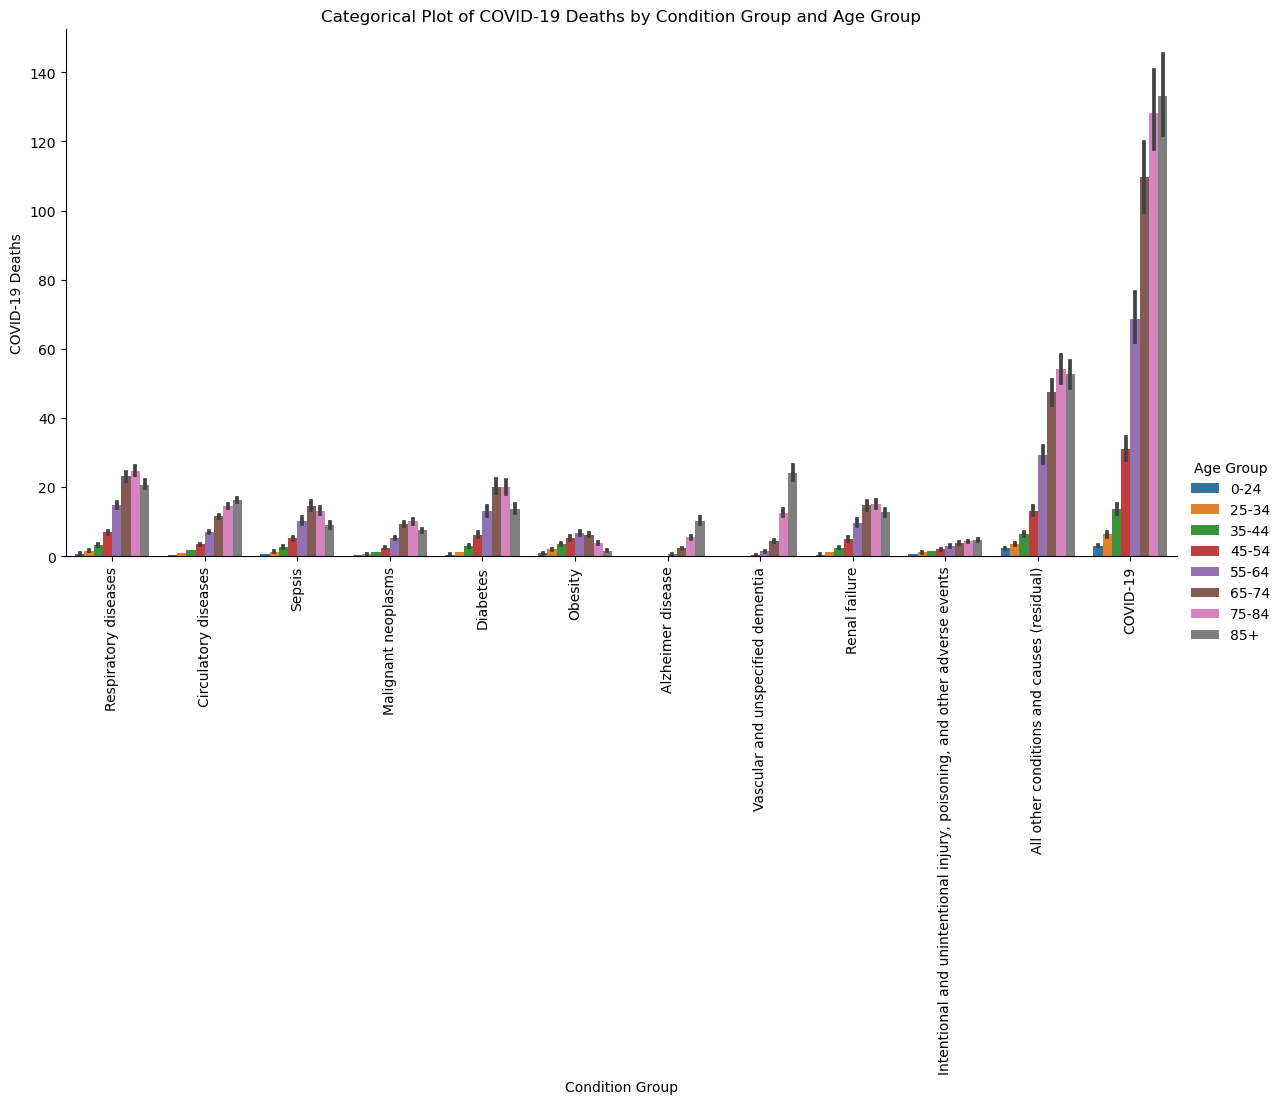

In [35]:
# Categorical plot for COVID-19 Deaths by Condition Group and Age Group
plt.figure(figsize=(12, 8))
sns.catplot(x='Condition Group', y='COVID-19 Deaths', hue='Age Group', data=df_selected, kind='bar', height=6, aspect=2)
plt.title('Categorical Plot of COVID-19 Deaths by Condition Group and Age Group')
plt.xticks(rotation=90)
catplot_conditiongroup_agegroup_deaths = plt.gcf()
plt.show()

### Create categorical plots for specific medical conditions for "Condition" column.

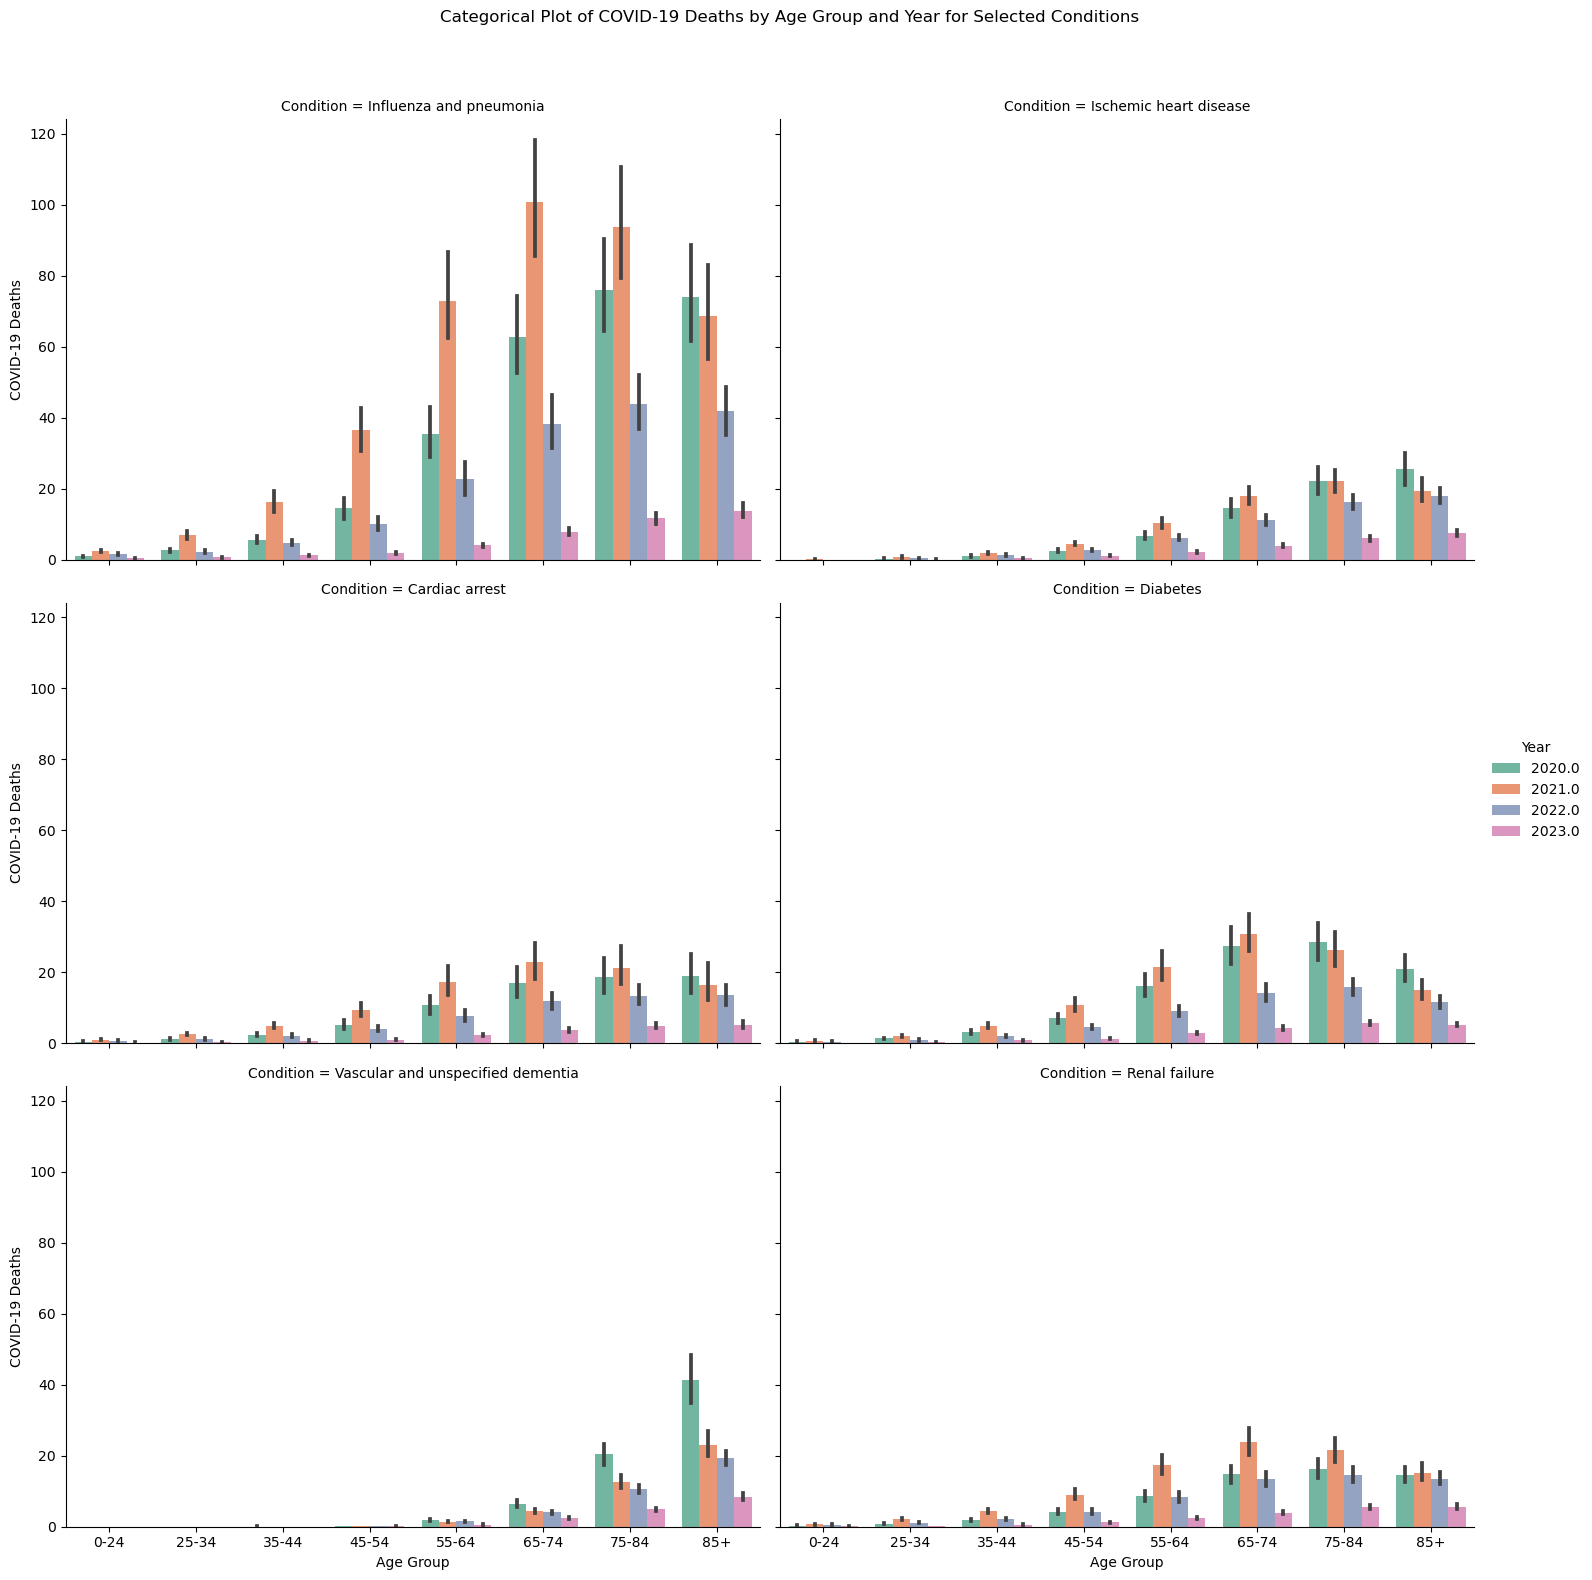

In [36]:
# Select columns and conditions for the plot
categorical_columns = ['Year', 'Age Group', 'COVID-19 Deaths']
conditions_for_categorical_plot = ['Influenza and pneumonia', 'Vascular and unspecified dementia', 'Diabetes', 'Cardiac arrest', 'Ischemic heart disease', 'Renal failure']
df_categorical_conditions = df_selected[df_selected['Condition'].isin(conditions_for_categorical_plot)]

# Create a categorical plot
g = sns.catplot(
    x='Age Group', 
    y='COVID-19 Deaths', 
    hue='Year', 
    col='Condition', 
    col_wrap=2,
    data=df_categorical_conditions, 
    kind='bar', 
    height=5,
    aspect=1.5,
    palette='Set2')
g.fig.suptitle('Categorical Plot of COVID-19 Deaths by Age Group and Year for Selected Conditions', y=1.05)
catplot_selected_conditions = plt.gcf()
plt.show()

### Insights from the Categorical Plots
### COVID-19 Deaths By Condition Group and Age Group:
Higher Death counts in specific Condition Groups: Some condition groups, like influenza and pnneumonia and cardiovascular diseases, have higher COVID-19 deaths counts compared to others.

Age Group Influence: Older age group have higher death counts across various condition groups.

### COVID-19 Deaths by Age Group and Year for specific conditions:
Temporal Trends: Specific conditions have variantion death counts over different yeras.

Condition Specific Insights: Conditions like diabetes, ischemic heart disease, and renal failure consistenly show higher death counts across olger age groups in different years.

# 8. Answer the questions

### 1) What are the most common conditions contributing to COVID-19 deaths is different age group?
From the categorical plots, influenza and pneumonia and cardiovascular diseases are most common conditions to COVID-19 deaths across all age groups, specially older age groups affected. Some conditions like ischemic heart disease, diabadets, and renal failure are also high COVID-19 deaths in older age groups.

### 2) Which group have highest death and which conditions contributing to COVID-19 deaths?
The distribution shows older age groups have higher death counts for almost all conditions. Specially, conditions such as diabetes, ischenic heart disease, and cerebrovascular diseases impact older age groups.

### 3) Which states have highest specific conditions contributing to COVID-19 deaths?
Further analysis is needed.

### 4) What are the regional patterns and which region have highest COVID-19 deaths?
Further analysis is needed.

### 5) Which month or season has highest COVID-19 deaths?
Further analysis is needed.

### 6) How have COVID-19 death rates and contributing conditions changed over time?
The scatterplot of COVID-19 Deaths vs. Year represents slighly decrease in death rates over time.

### 7) What factor are most predictive of COVID-19 death rates?
Based on analysis, the most predictive factors are Number of Mentions of conditins, Age Group and specific high-risk conditions such as respiratory and cariovasular diseases. These factors represents strong correlations with COVID-19 death rates.

# 9. Define Hypotheses

### Hypothesis 1: If the age group is older, then the COVID-19 death count will be significantly higher compared to younger age groups across various conditions.
The scatterplots and pair plots represents older population consistently show higher death counts for multiple conditions.This is also supported stong positive correlations between Age Group and COVID-19 Deaths.

### Hypothesis 2: If condition like influenza and pneumonia, vascular and unspecified dementia, diabetes, ischemic heart disease, or renal failure, then they will have a higher COVID-19 death rate compared to with other conditions.
The correlation analysis and scatterplots represents very strong positive correlations between COVID-19 Deaths and these specific conditions and also higher risk of COVID-19 deaths.

### Hypothesis 3: If the number of mentions of specific conditions in medical records is high, then the COVID-19 death rate will also be high for those conditions.
The very strong positive correlation between Number of Mentions and COVID-19 Deaths (0.99) for multiple conditions.

# 10. Export visulizations to analysis folder

In [37]:
# Export heatmaps
heatmap_corr_matrix.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'heatmap_corr_matrix.png'))

In [38]:
# Export Scatterplots
scatterplot_mentions_deaths.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_mentions_deaths.png'))

scatterplot_agegroup_deaths.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_agegroup_deaths.png'))

scatterplot_mentions_agegroup.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_mentions_agegroup.png'))

scatterplot_condition_deaths.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_condition_deaths.png'))

scatterplot_year_deaths.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_year_deaths.png'))

scatterplot_influenza_pneumonia.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_influenza_pneumonia.png'))

scatterplot_vascular_dementia.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_vascular_dementia.png'))

scatterplot_ischemic_heart_disease.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_ischemic_heart_disease.png'))

scatterplot_renal_failure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_renal_failure.png'))

scatterplot_respiratory_distress.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_respiratory_distress.png'))

scatterplot_respiratory_distress_year.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_respiratory_distress_year.png'))

scatterplot_obesity_year.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_obesity_year.png'))

scatterplot_covid19_year.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_covid19_year.png'))

scatterplot_diabetes_year.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_diabetes_year.png'))

scatterplot_influenza_year.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_influenza_year.png'))

In [ ]:
# Export Pair Plots
pair_plot_entire_dataset.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pair_plot_entire_dataset.png'))

In [ ]:
# Export Categorical Plots
catplot_conditiongroup_agegroup_deaths.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'catplot_conditiongroup_agegroup_deaths.png'))

catplot_selected_conditions.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'catplot_selected_conditions.png'))